In [1]:
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import os
os.chdir('..')
import virl
from helper_methods import run, plot
from plot_helper import plot as eval_plot

import pickle

In [6]:
#evaluate the stochastic and noisy parameters
stochastic_noisy = {0:virl.Epidemic(stochastic=False, noisy=False),1:virl.Epidemic(stochastic=True, noisy=False),2:virl.Epidemic(stochastic=False, noisy=True),3:virl.Epidemic(stochastic=True, noisy=True)}
stochastic_noisy_print = {0:"stochastic=False, noisy=False",1:"stochastic=True, noisy=False",2:"stochastic=False, noisy=True",3:"stochastic=True, noisy=True"}


In [ ]:
def mean_std(all_total_rewards,all_rewards,title):
    #mean and standard deviation
    total_reward_sd = np.std(all_total_rewards)
    total_reward_mean = np.mean(all_total_rewards)
    reward_sd = np.std(all_rewards)
    reward_mean = np.mean(all_rewards)

    print(title)
    print("Total reward standard deviation = " + str(total_reward_sd))
    print("Total reward mean = " + str(total_reward_mean))
    print("Reward standard deviation = " + str(reward_sd))
    print("Rotal reward mean = " + str(reward_mean))

## Deterministic

C:\Users\idree\ai4\ai-coursework-group6\notebooks\helper_methods.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1, 2, figsize=(20, 8))


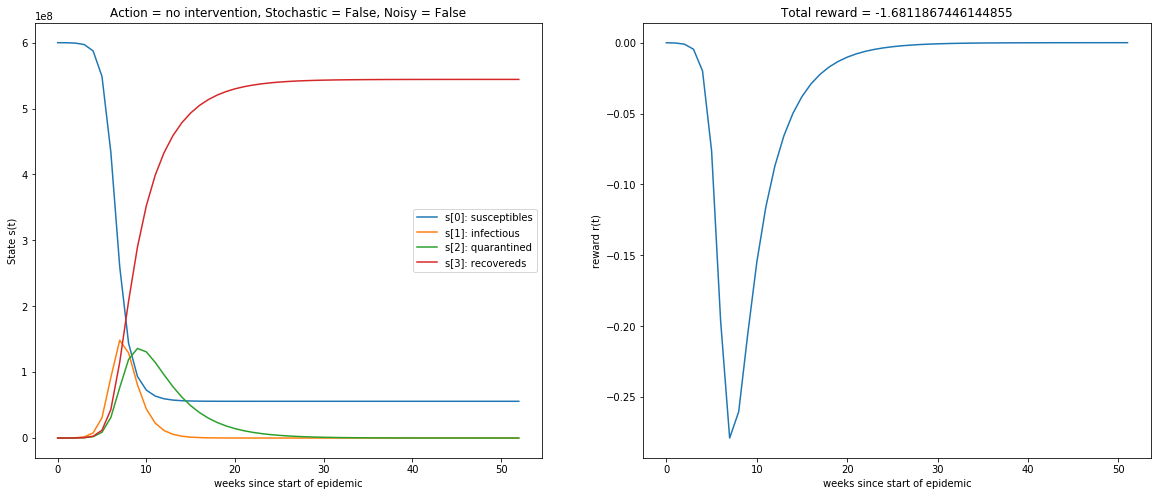

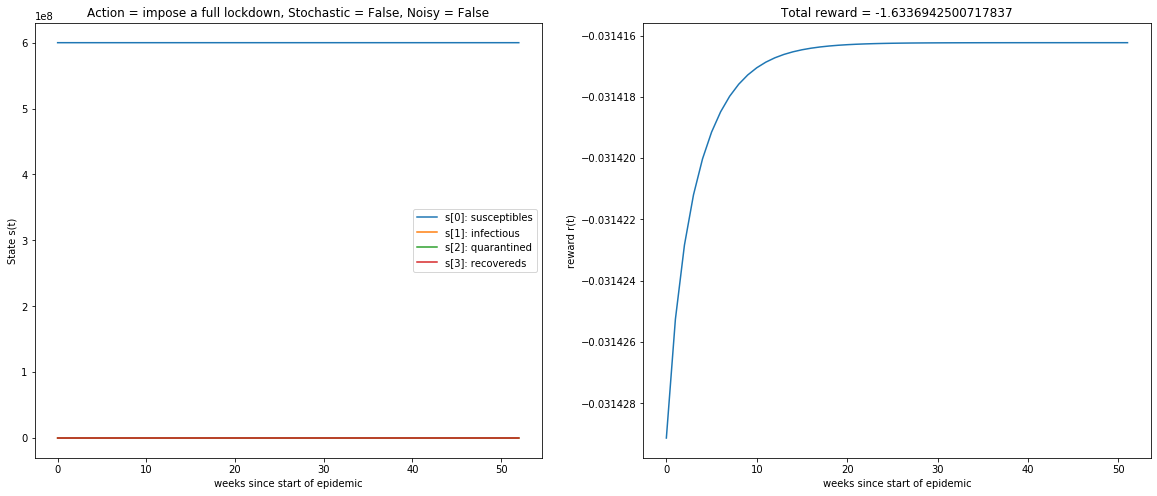

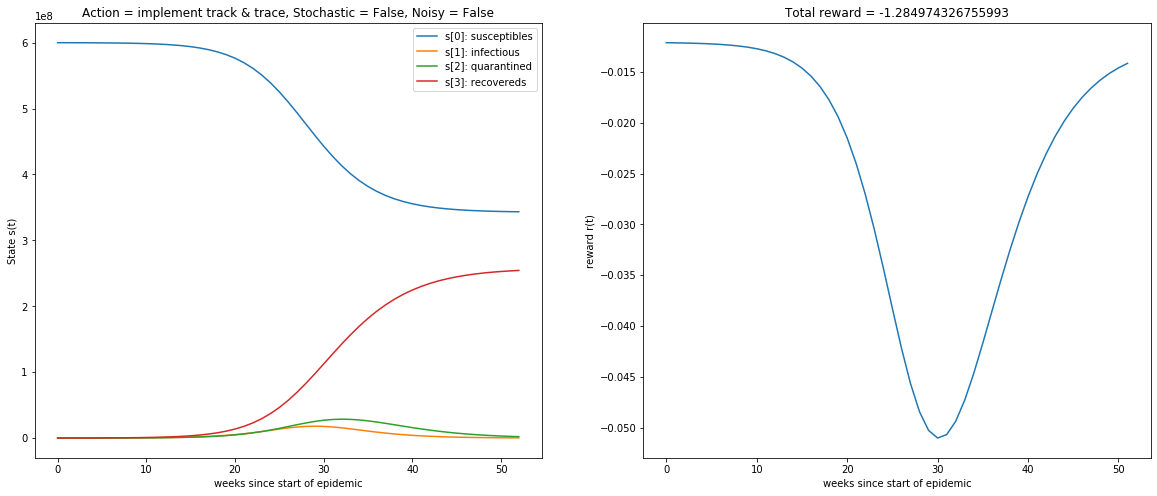

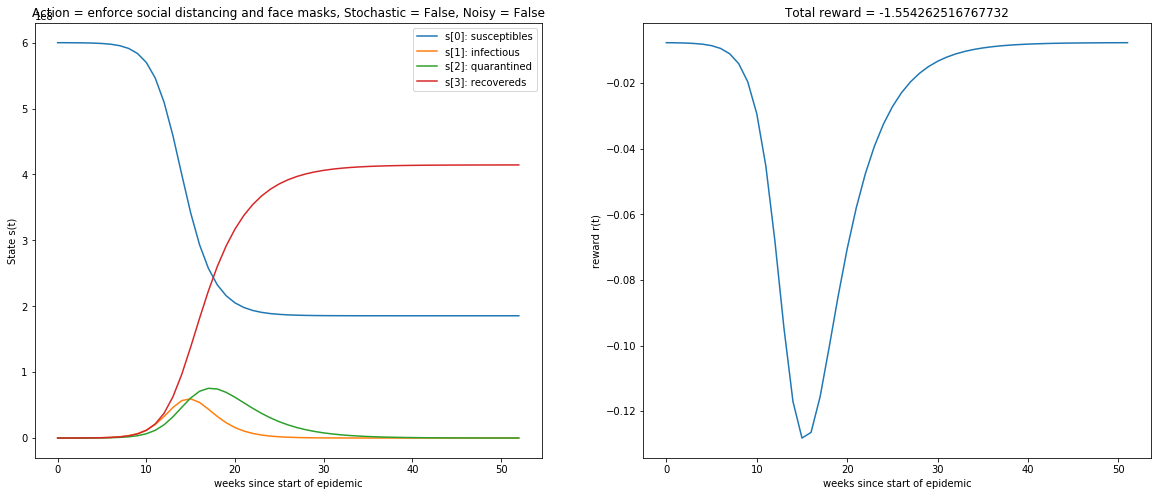

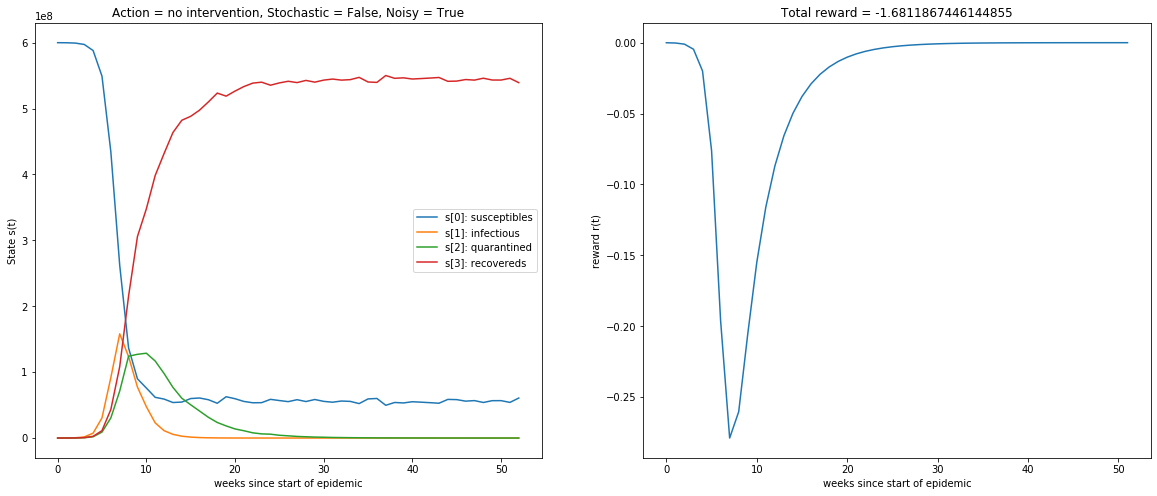

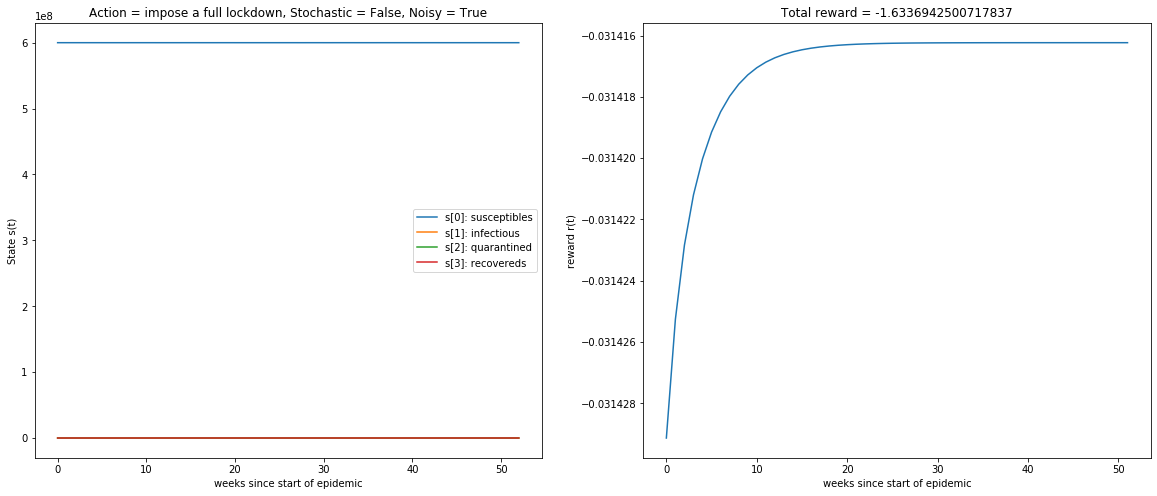

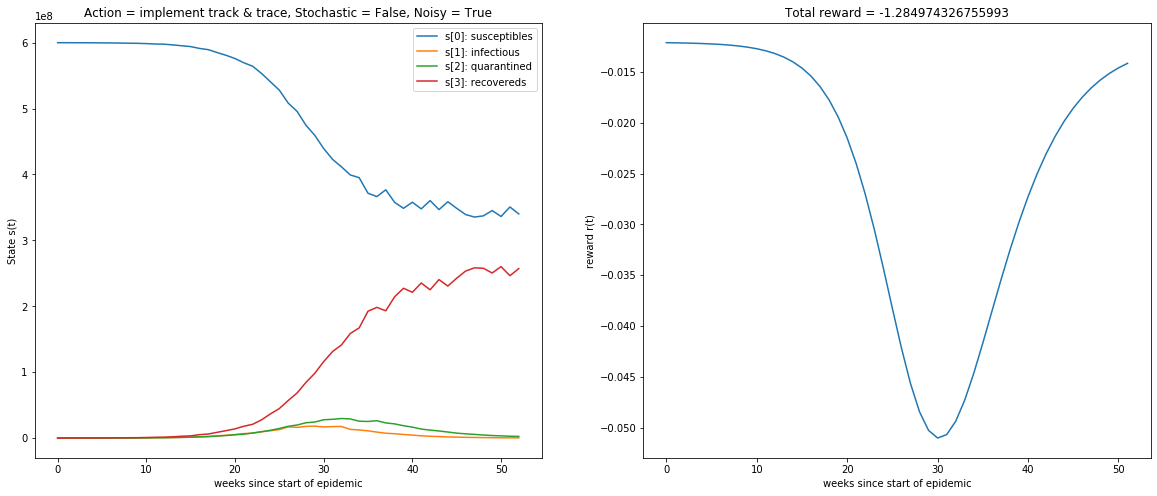

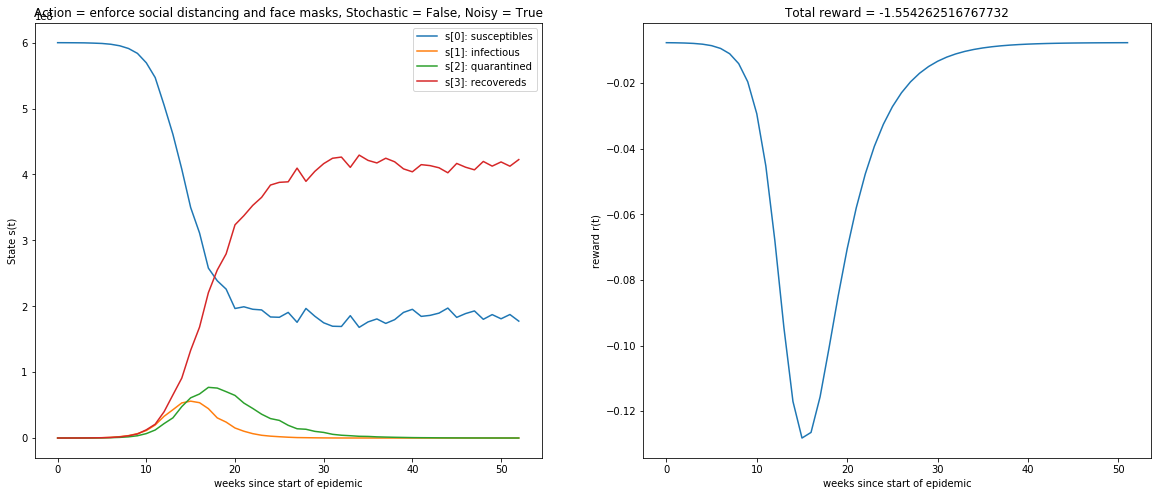

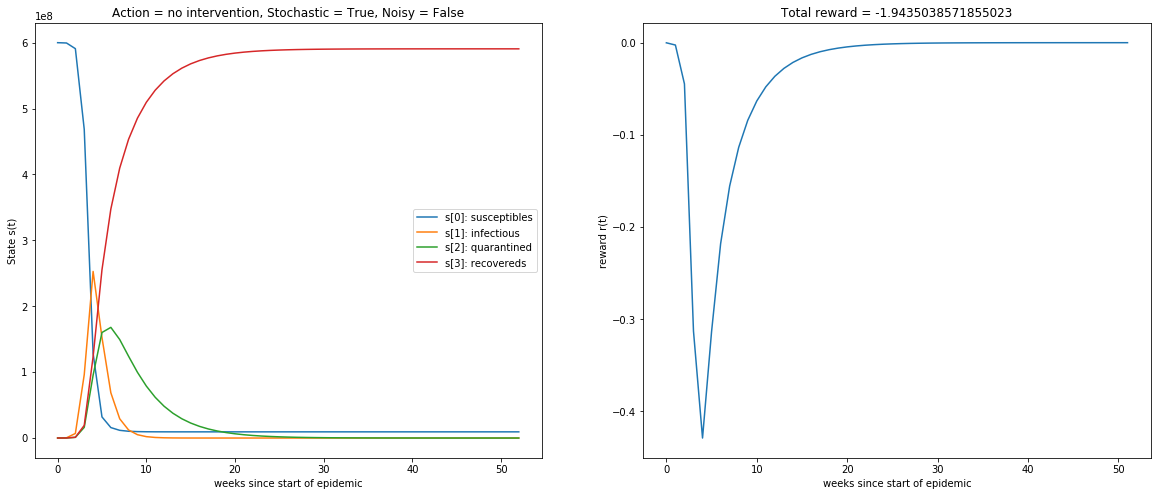

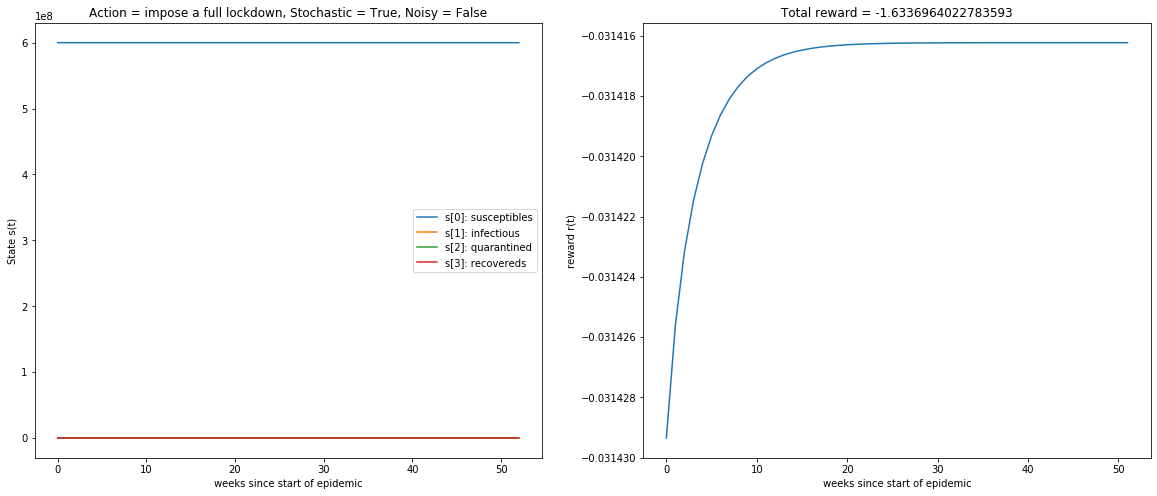

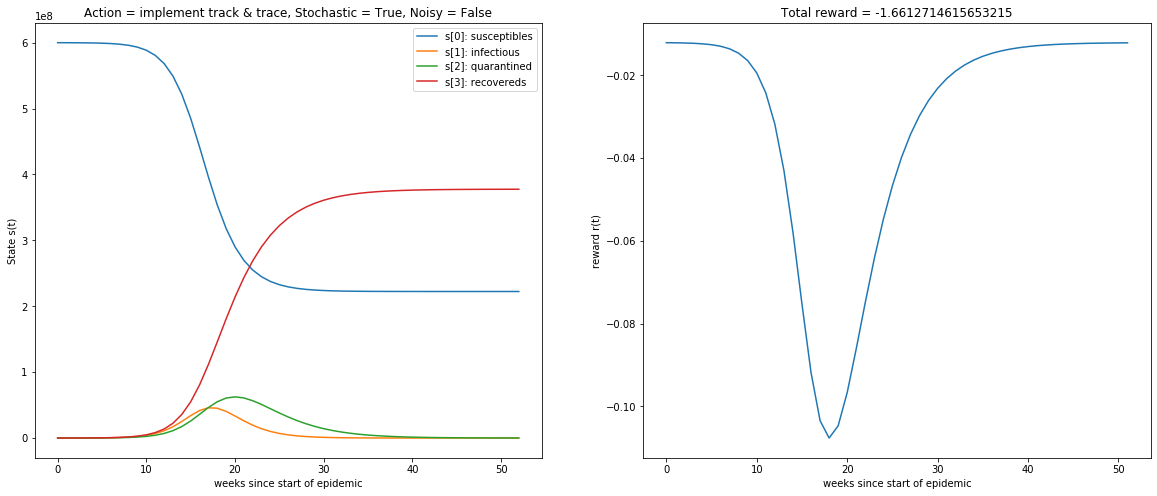

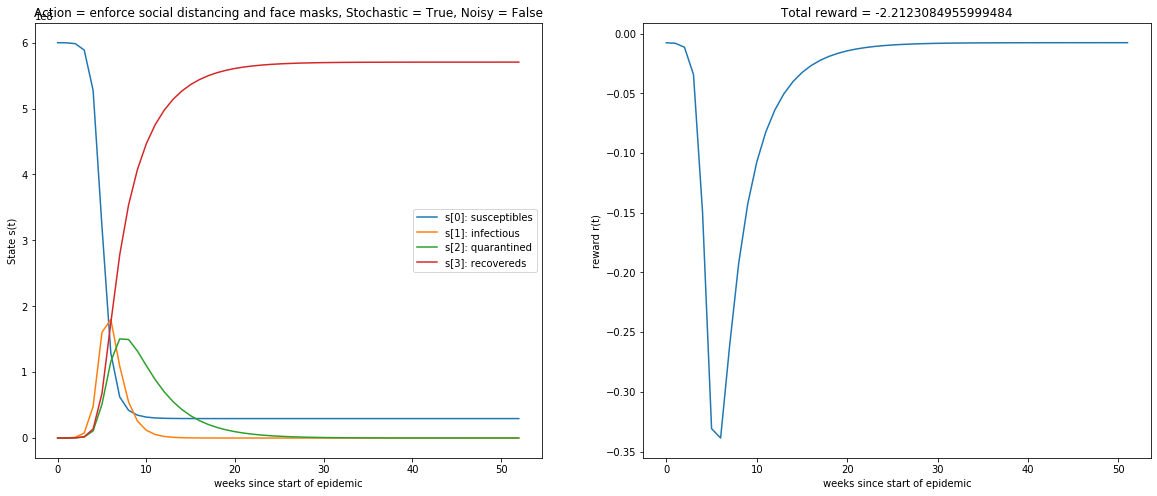

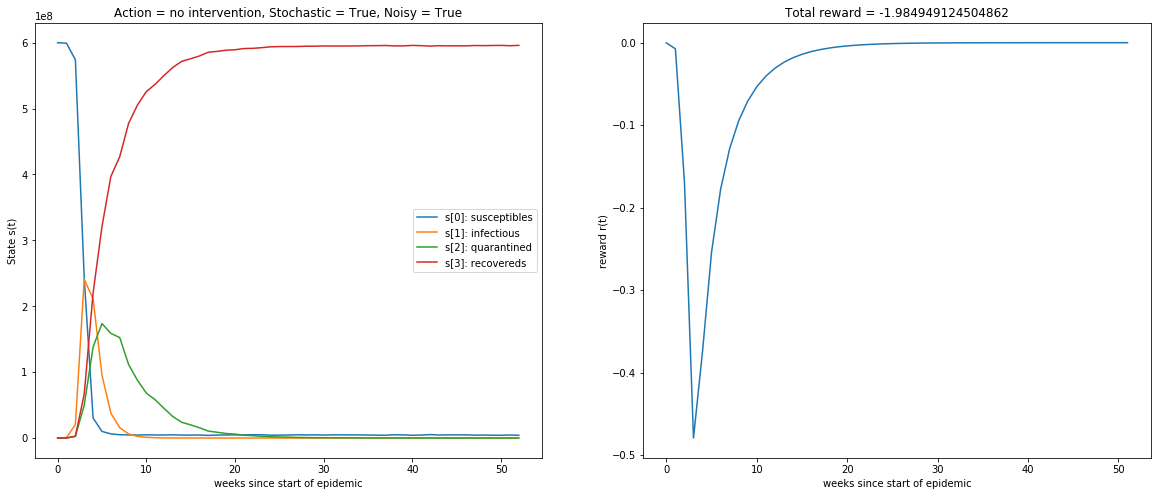

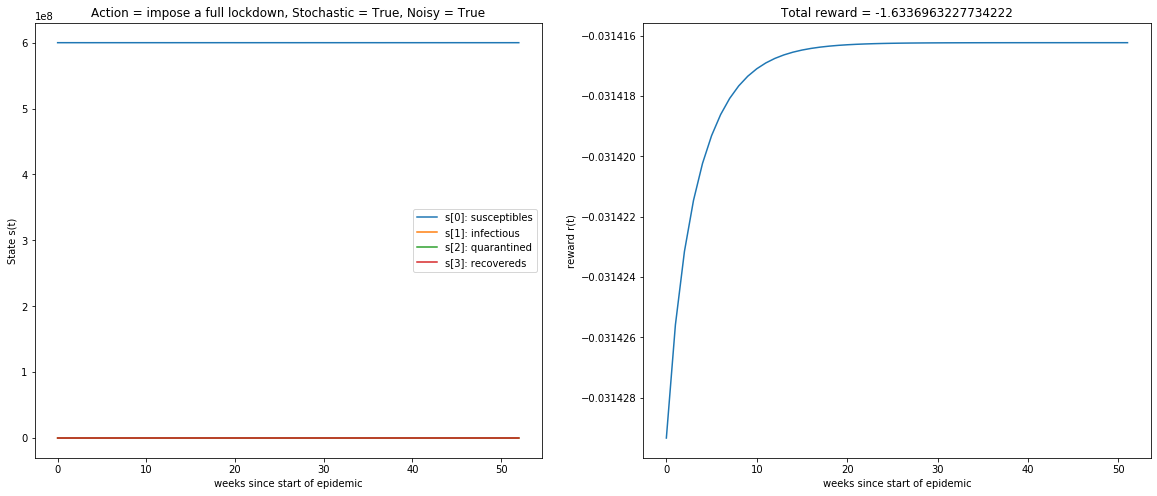

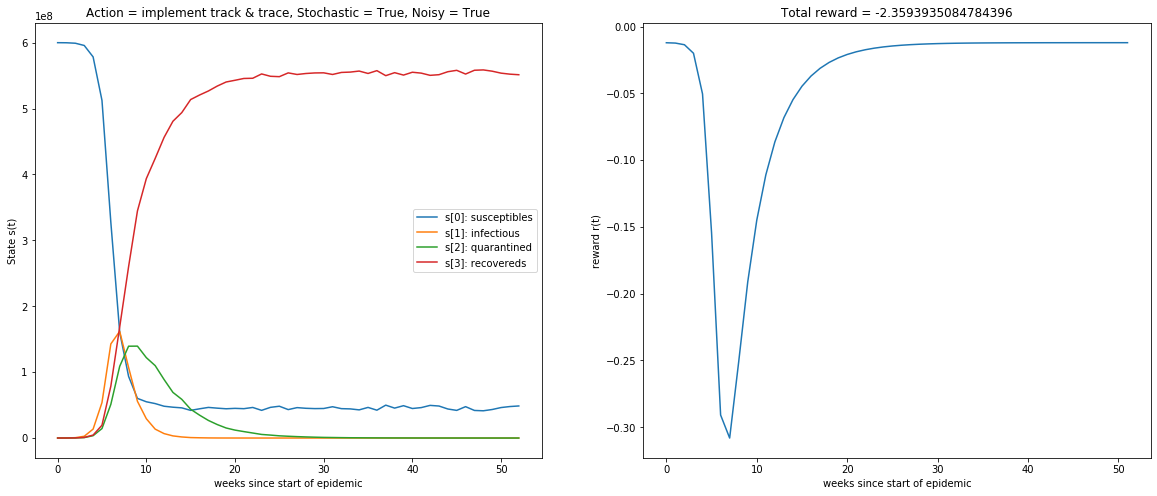

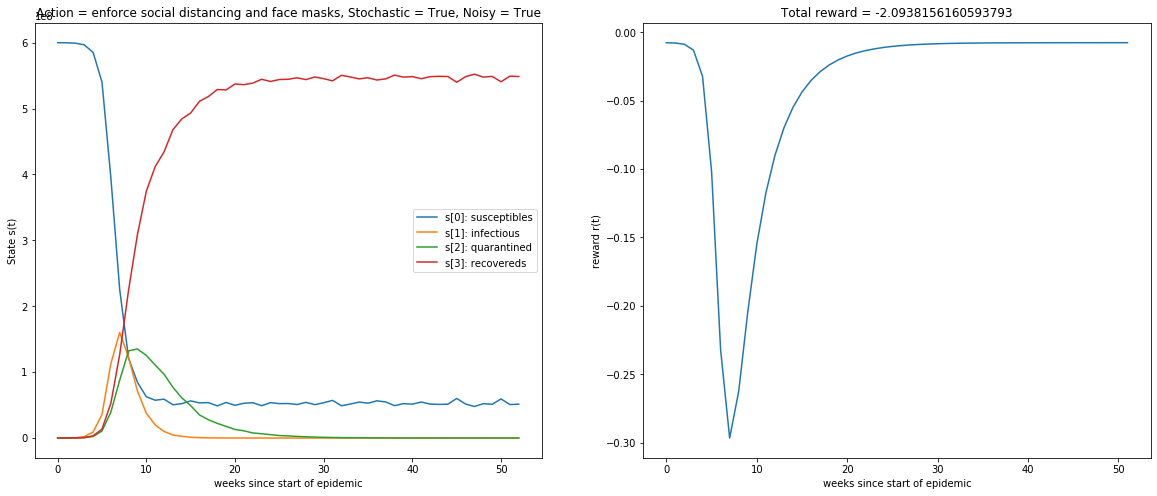

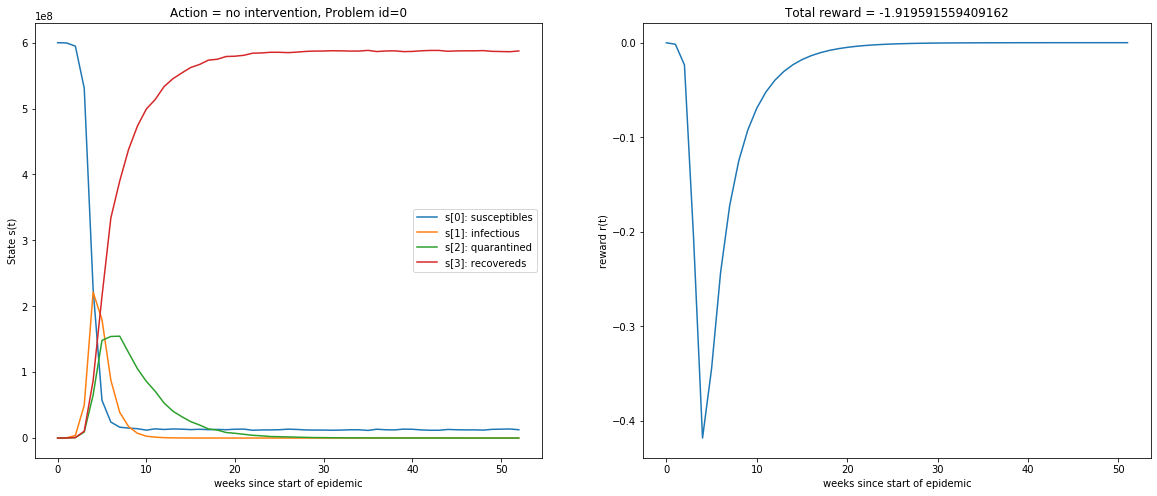

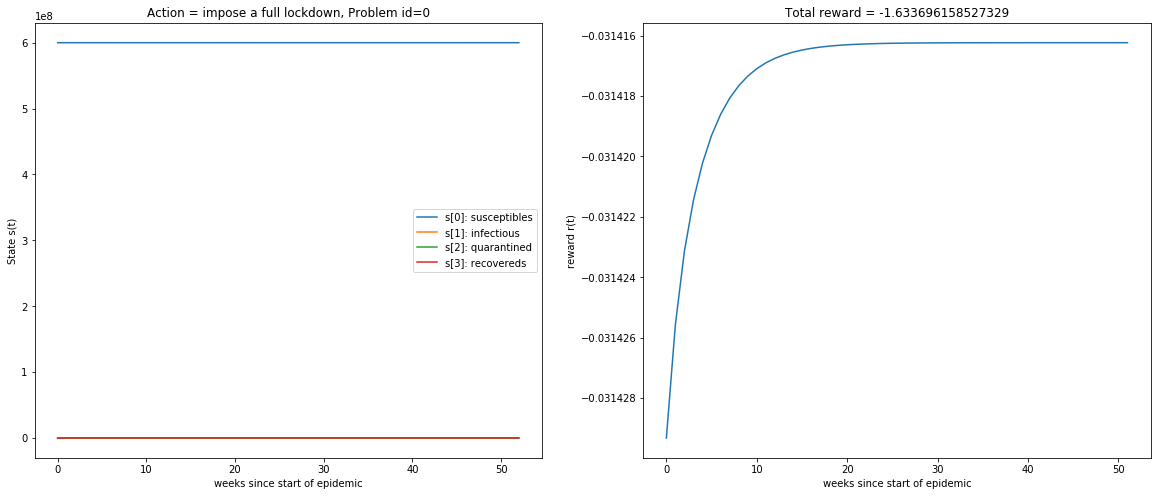

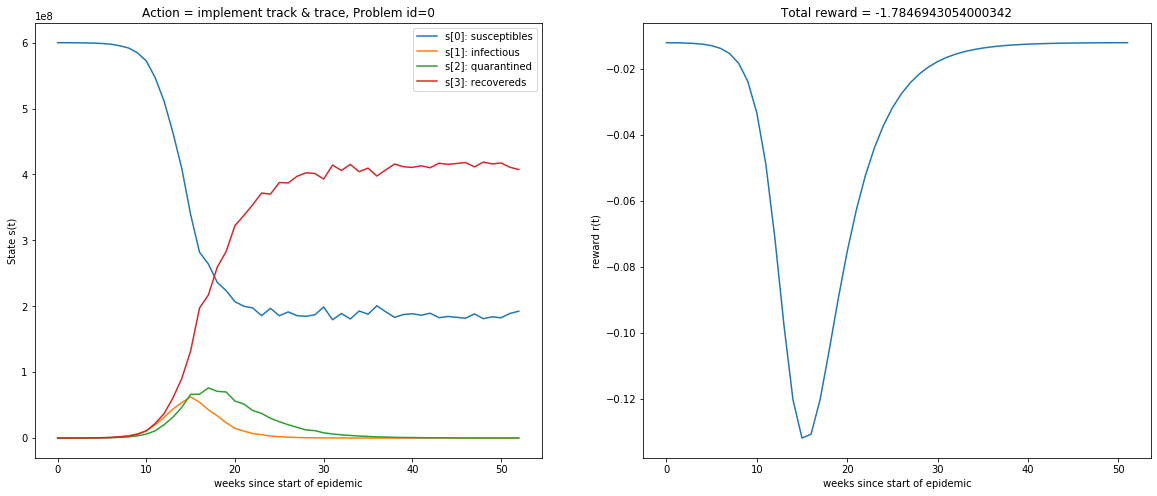

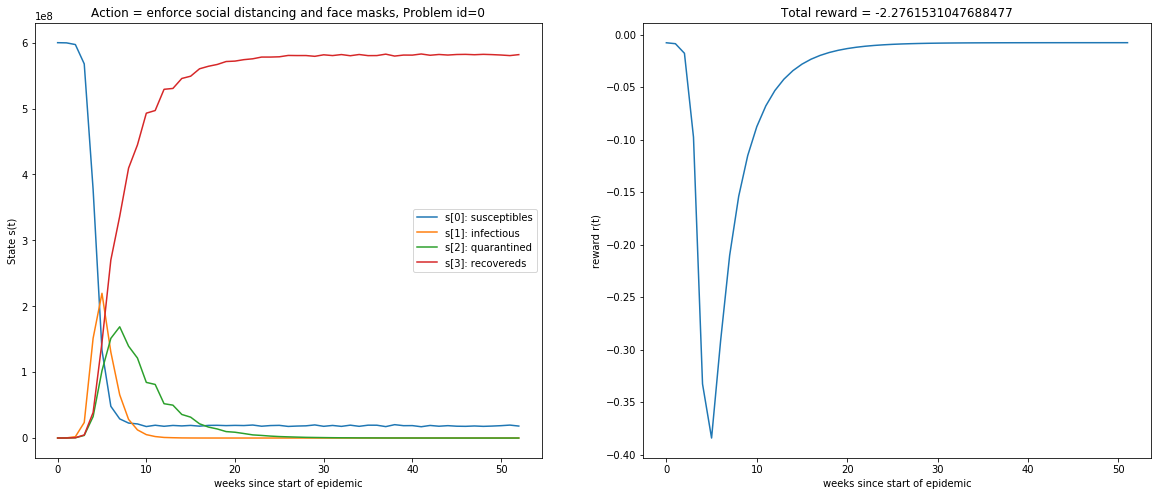

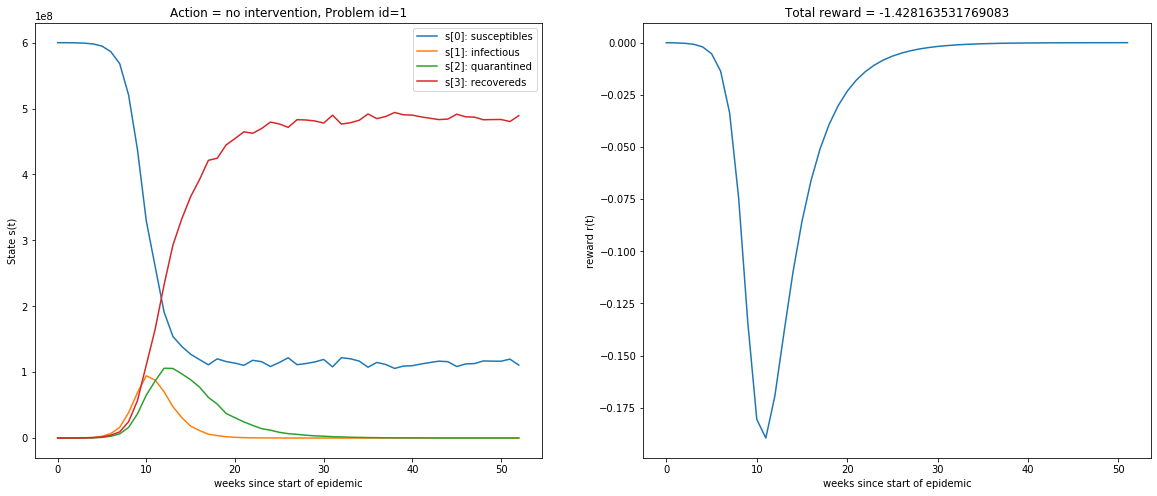

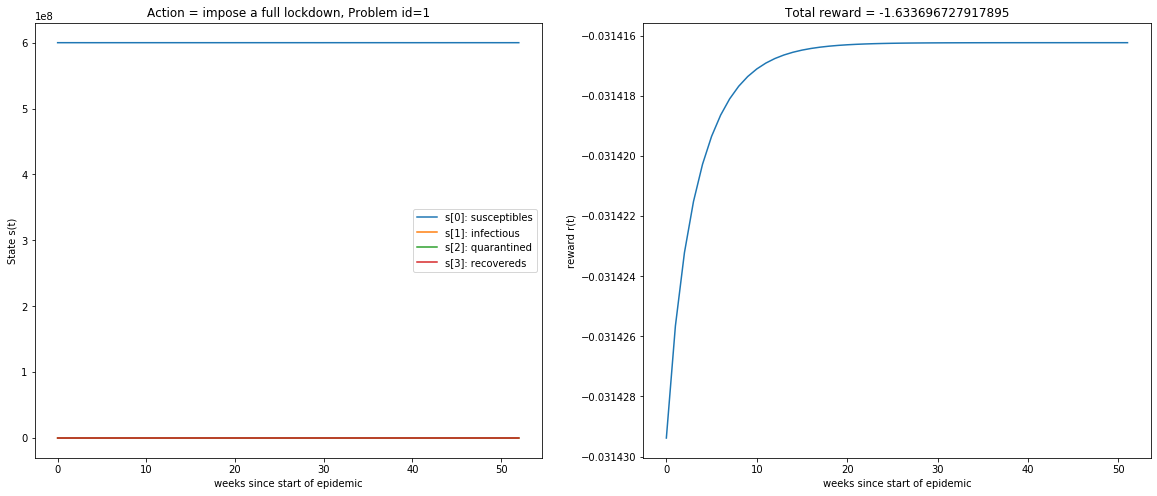

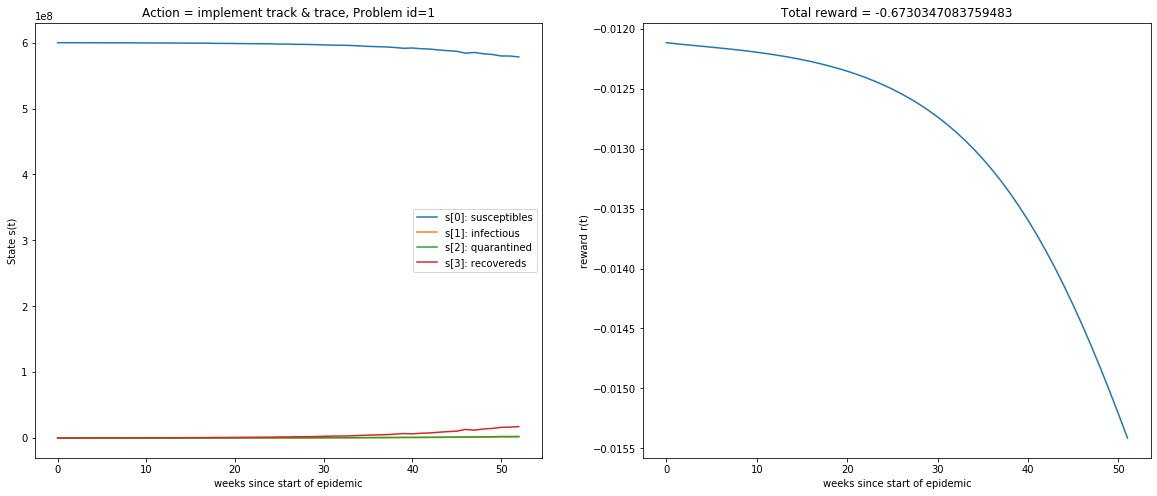

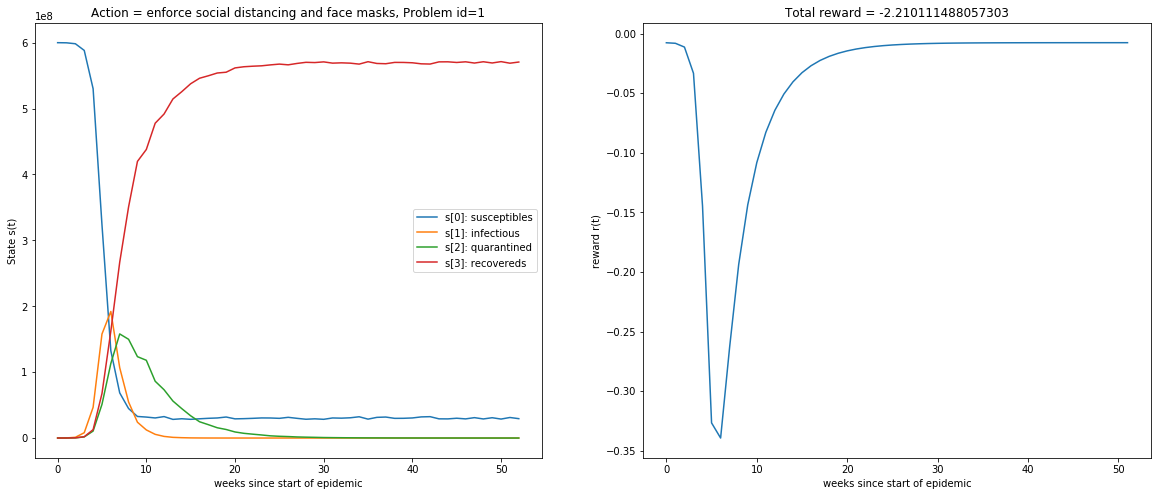

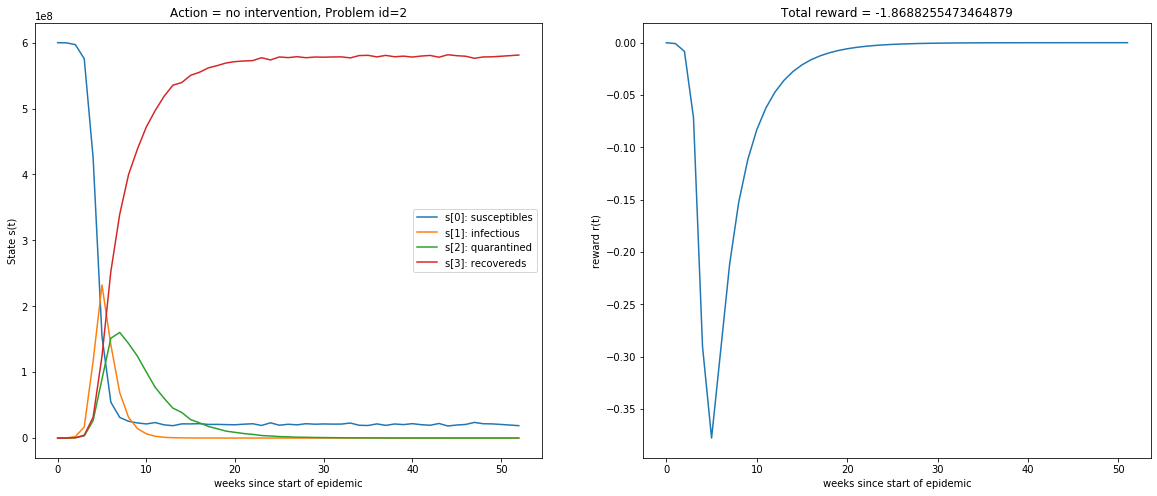

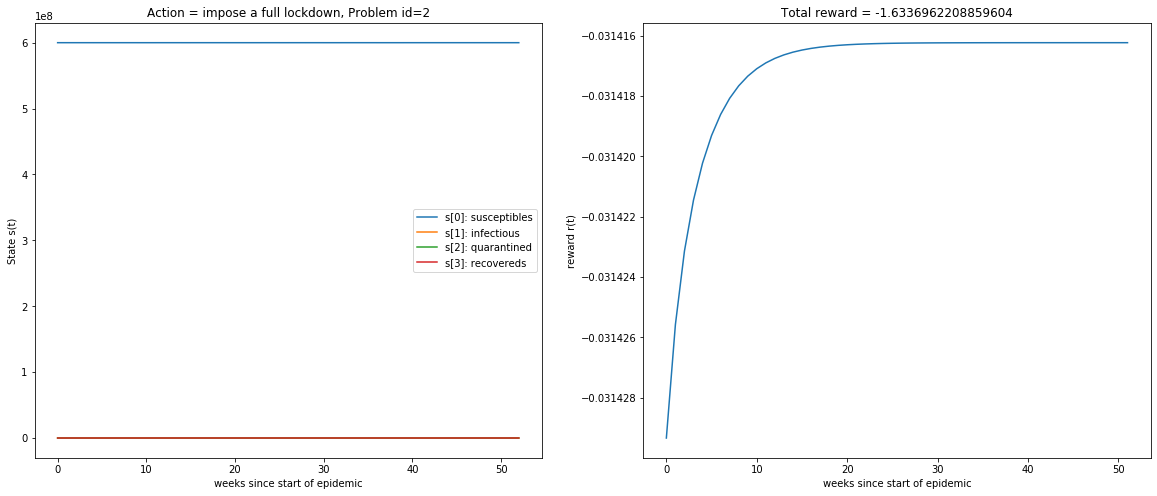

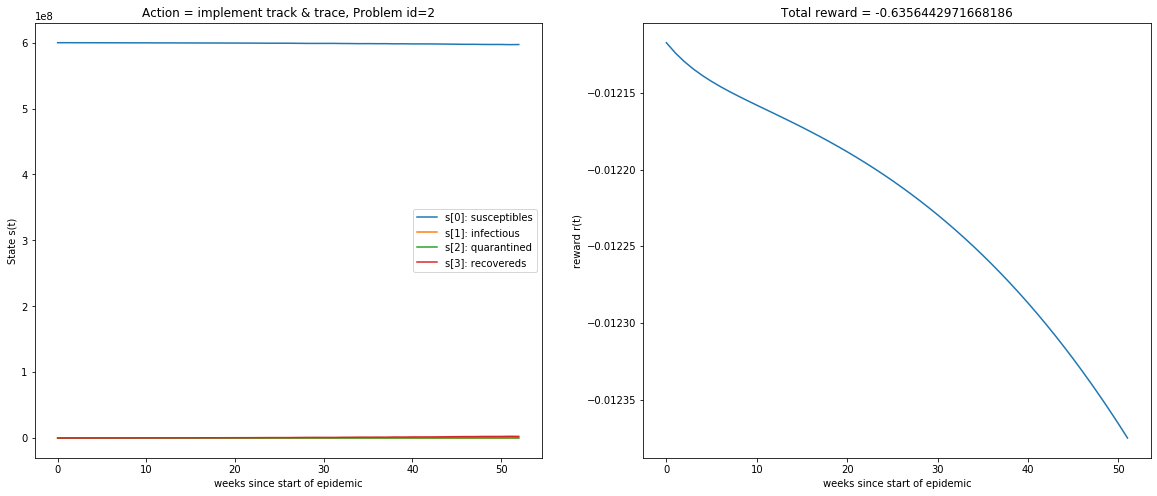

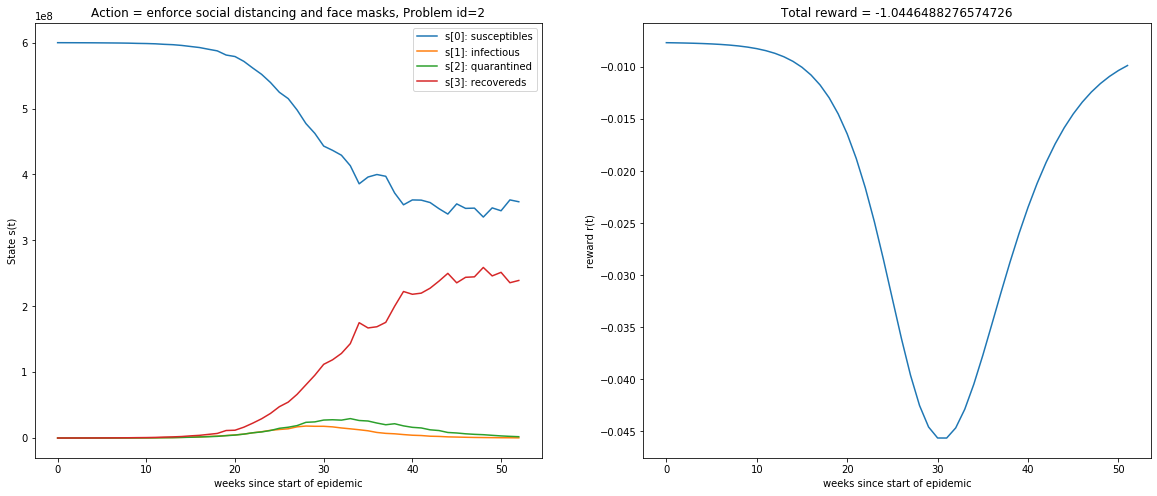

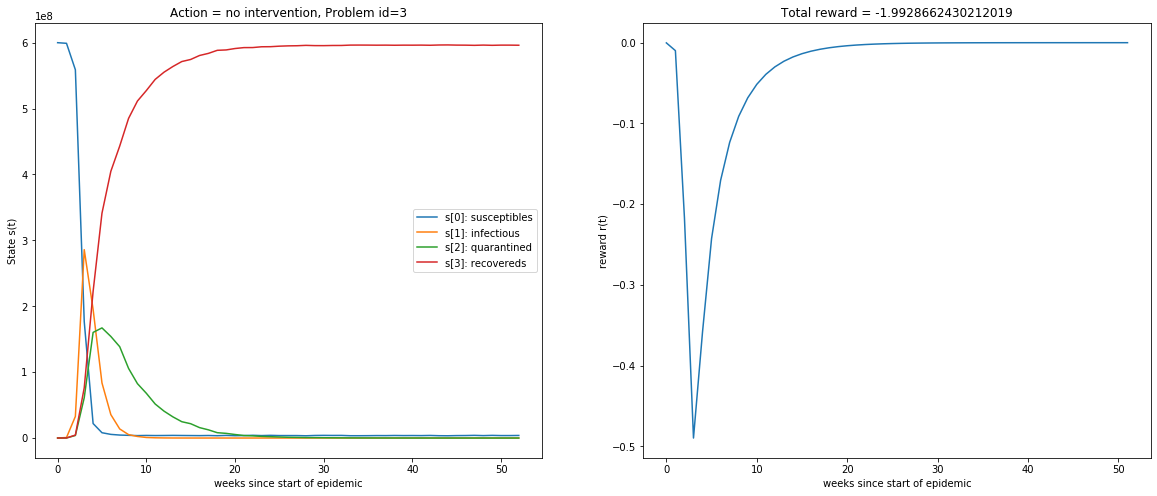

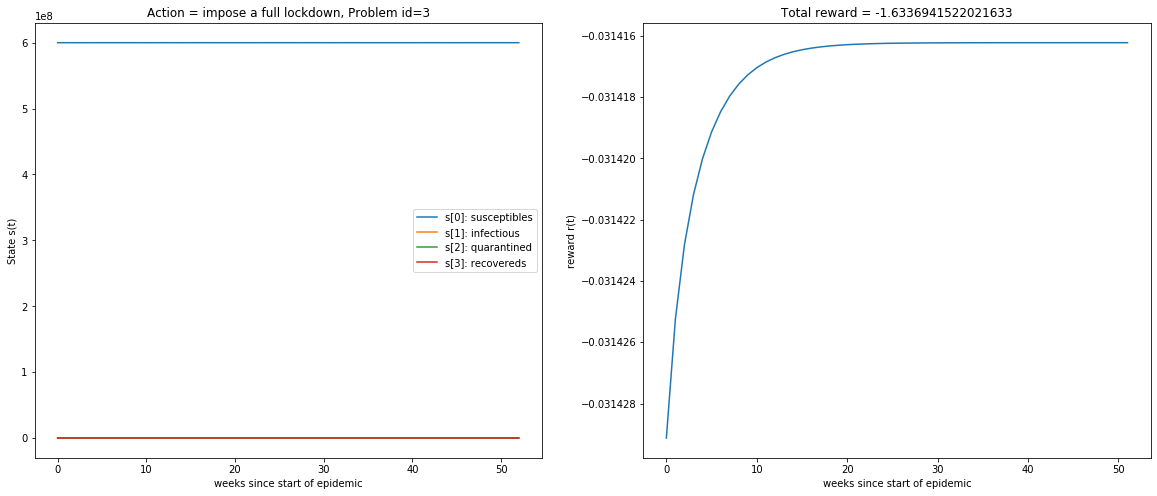

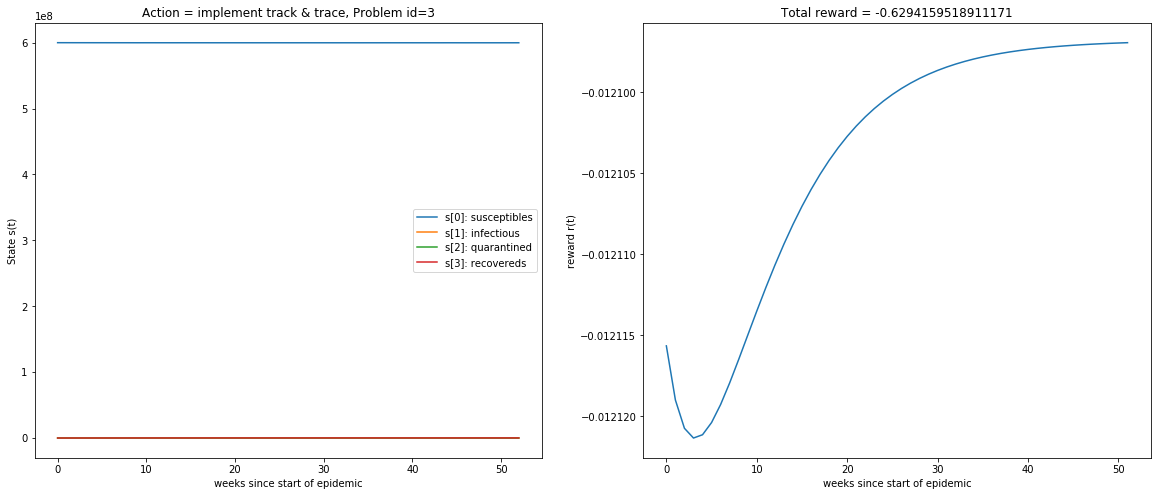

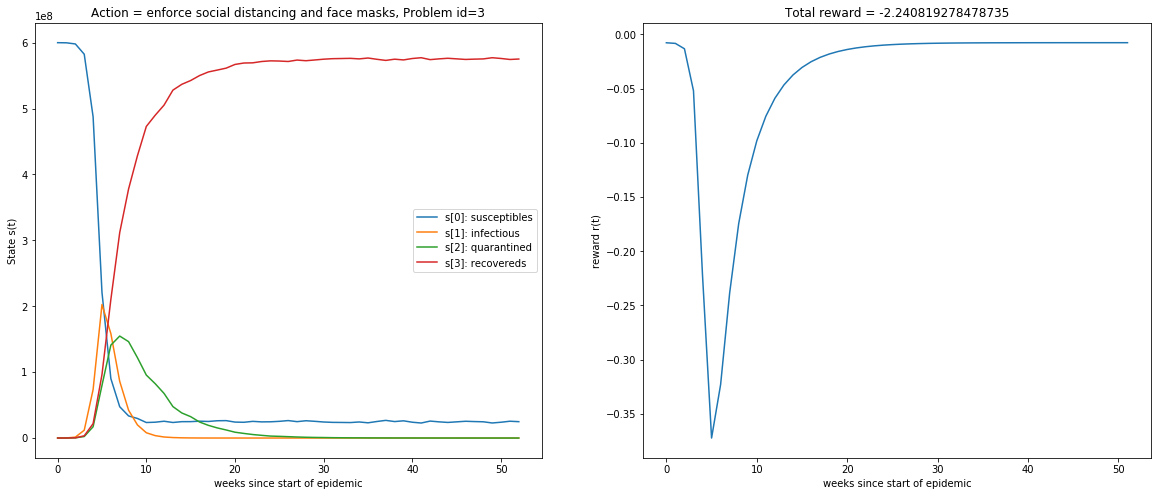

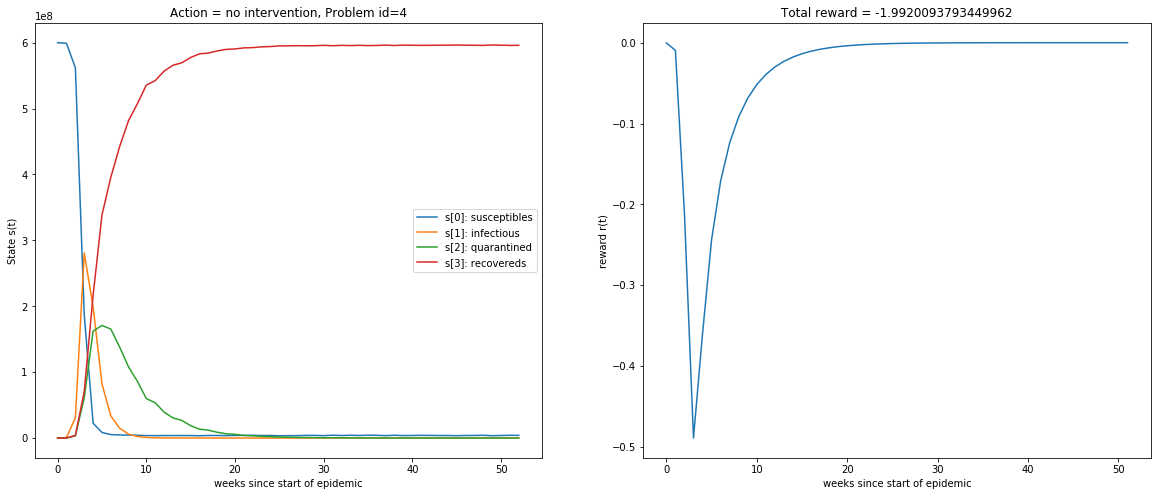

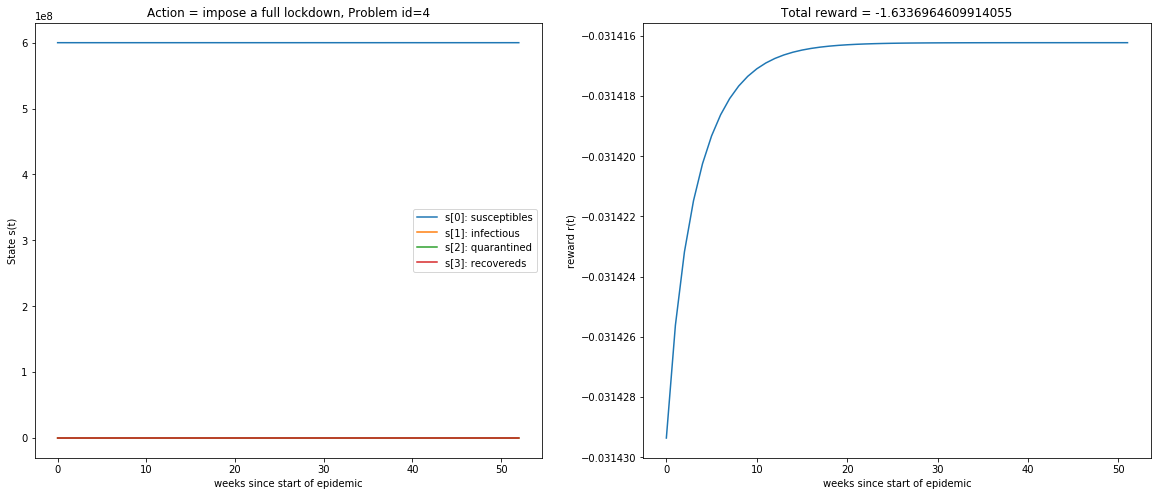

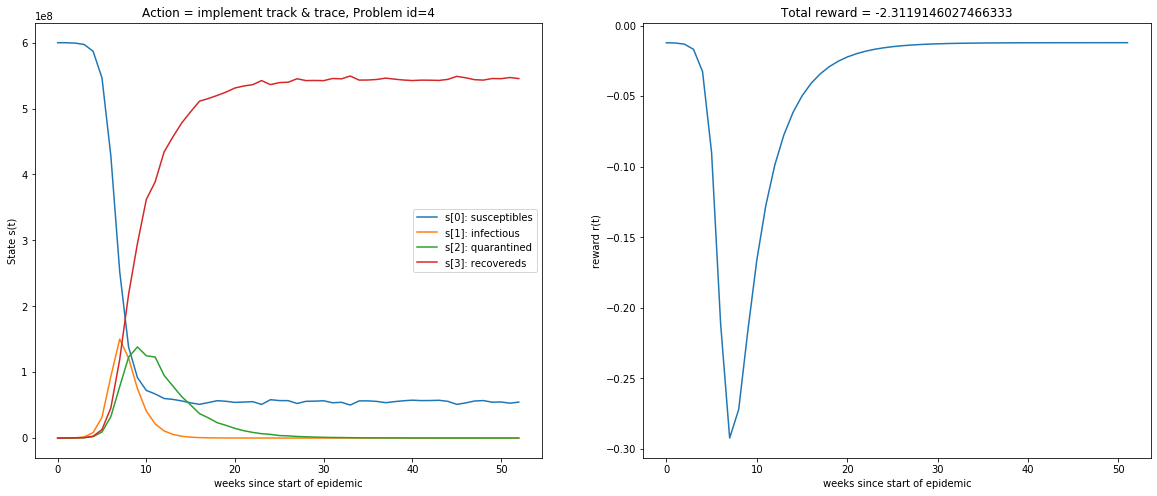

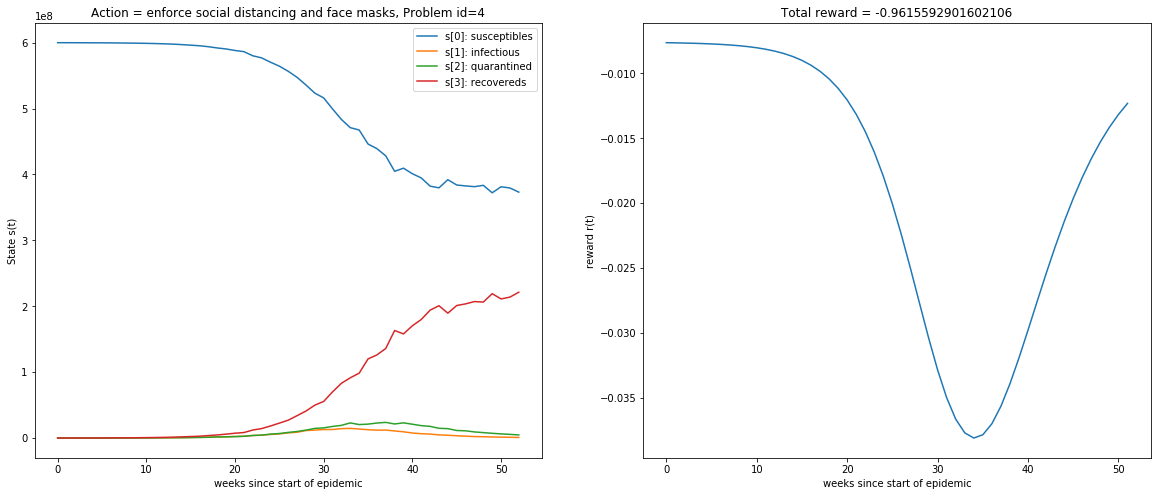

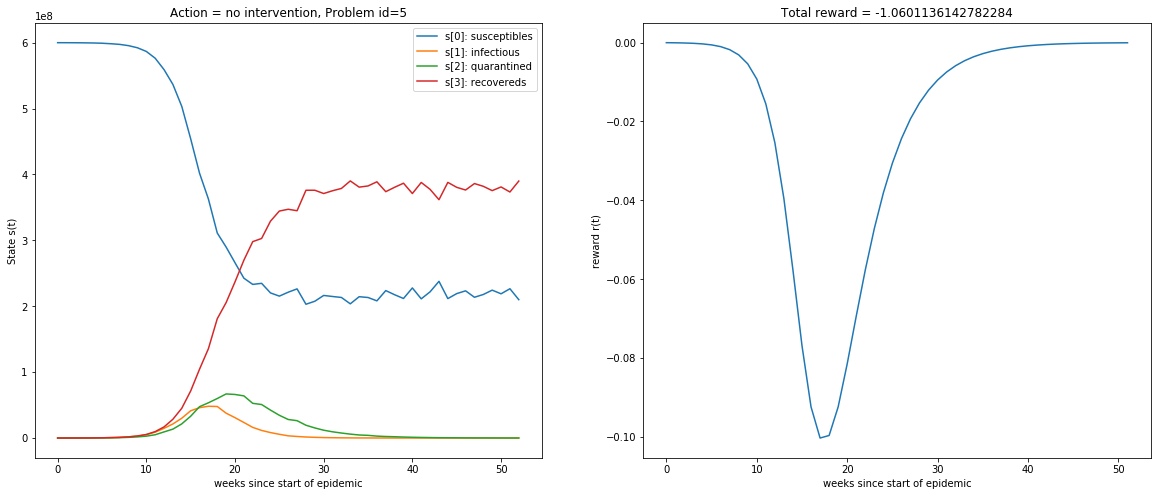

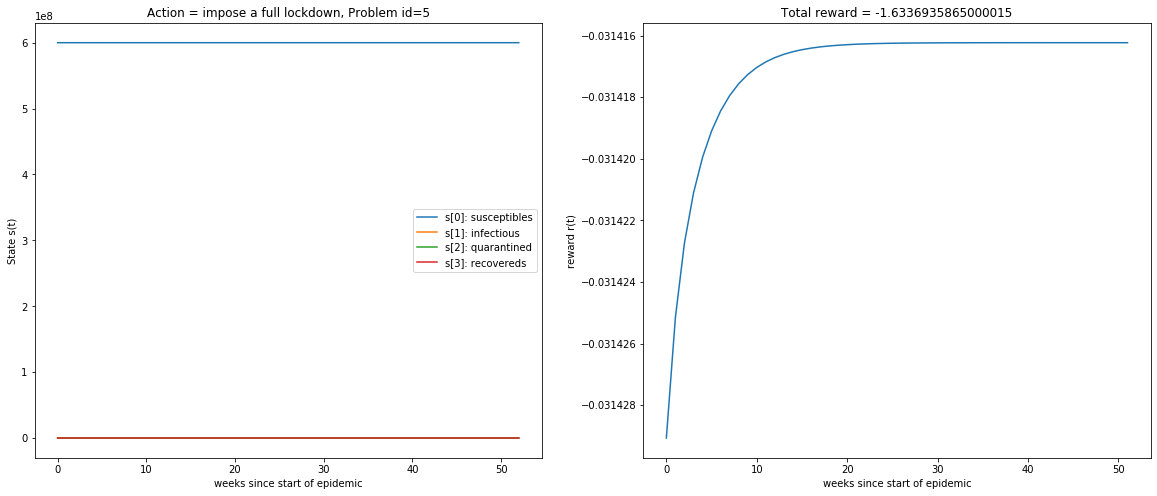

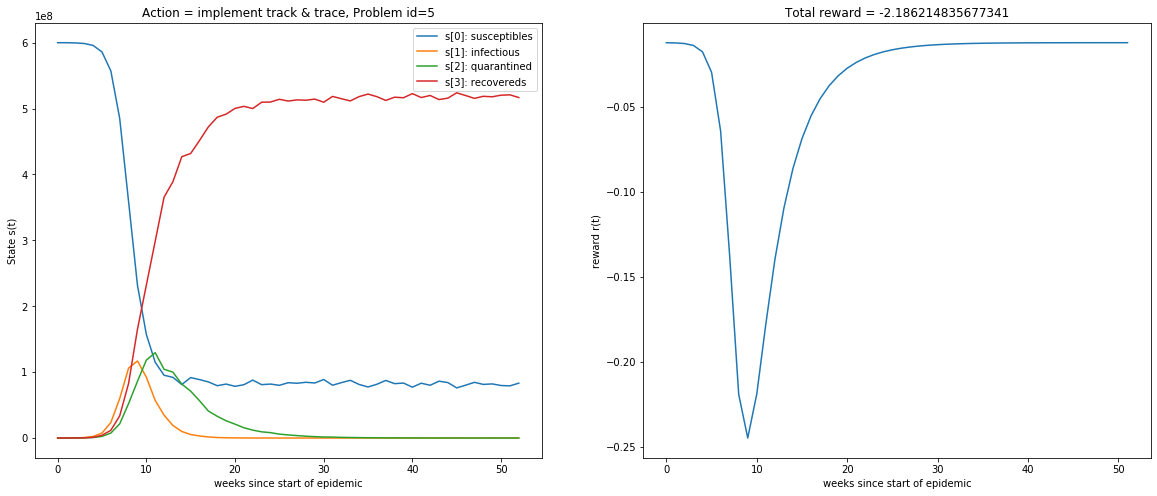

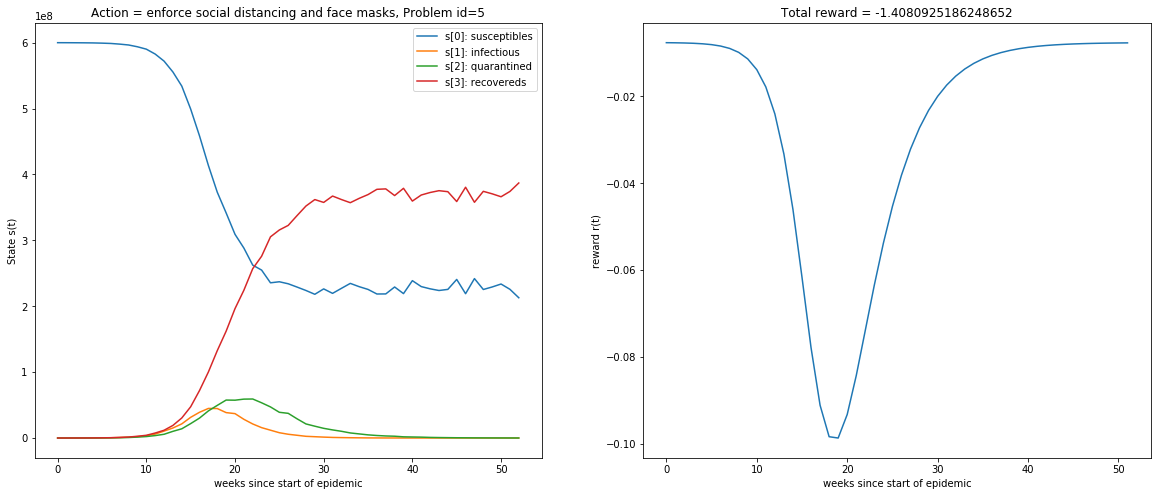

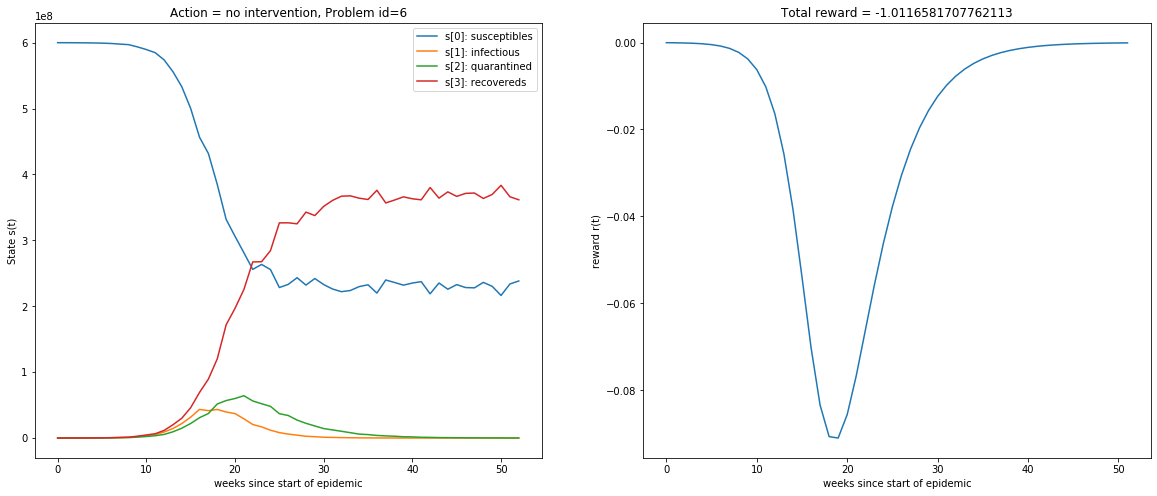

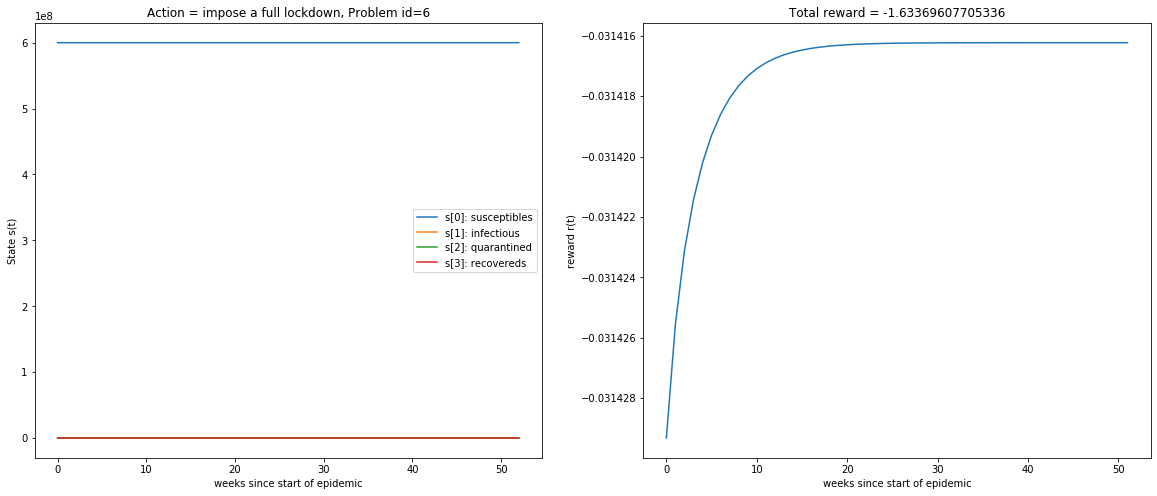

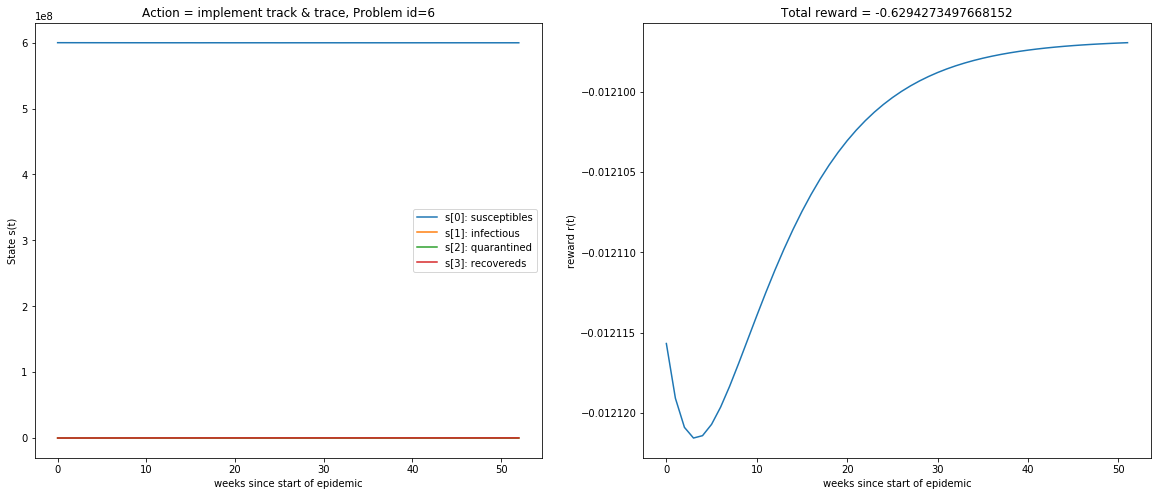

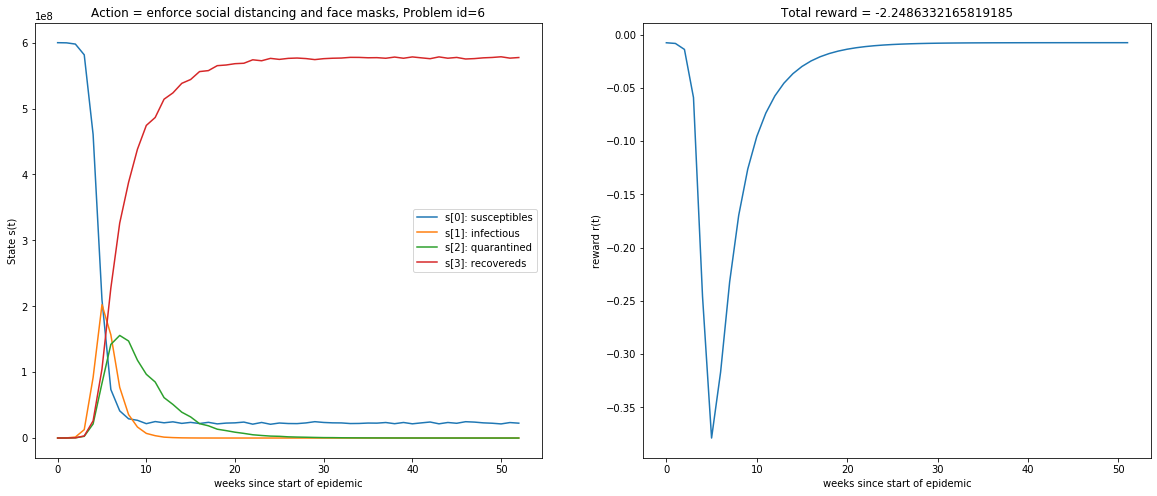

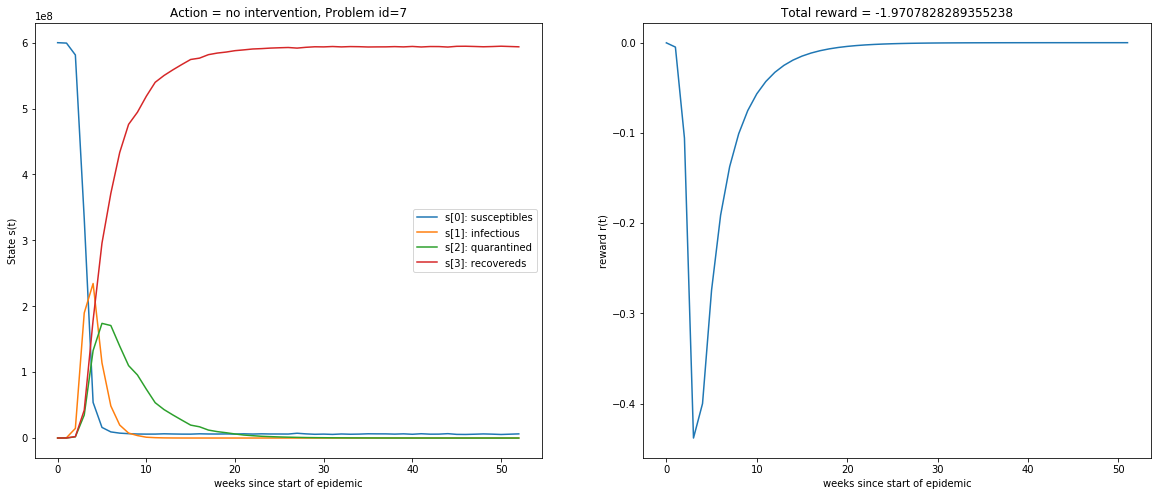

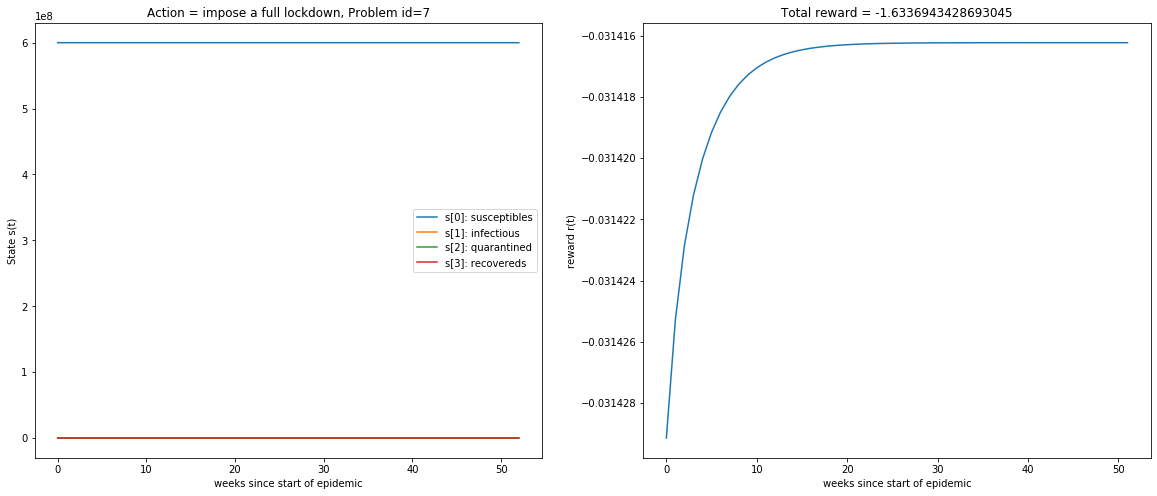

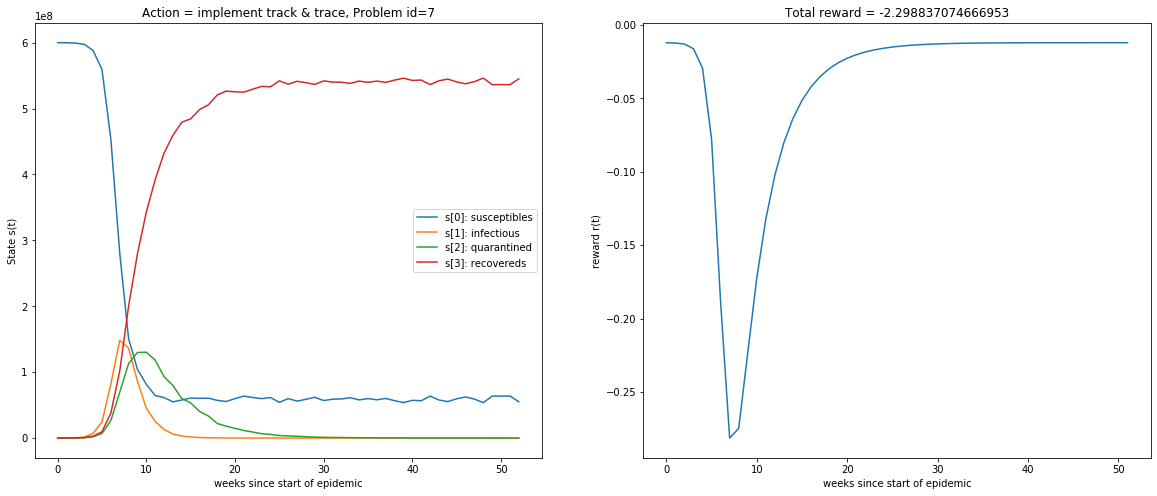

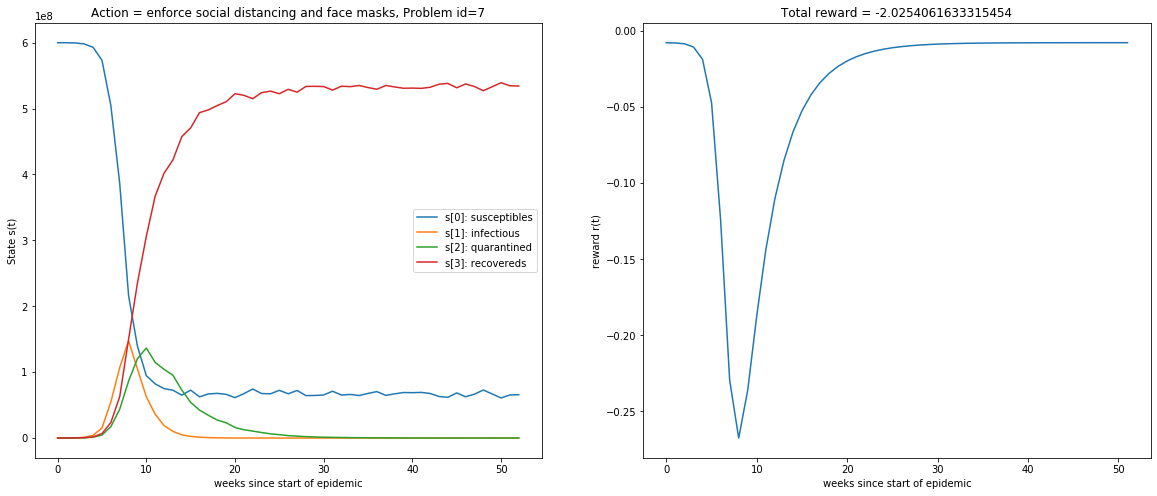

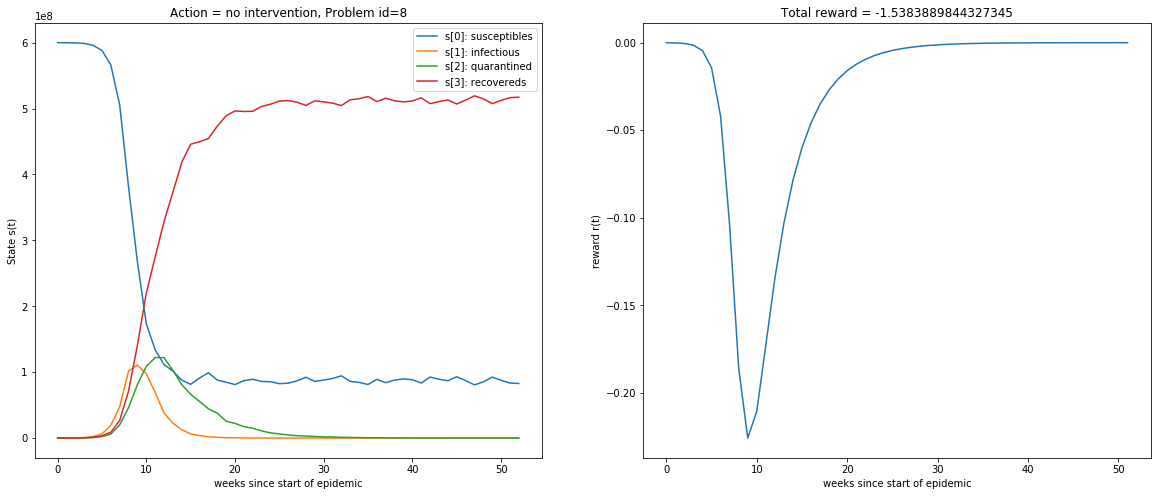

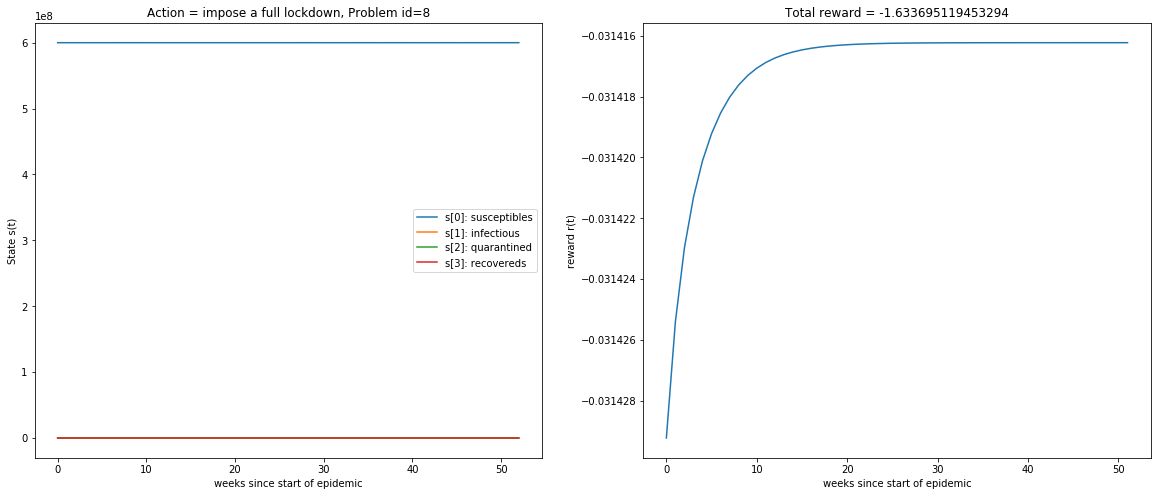

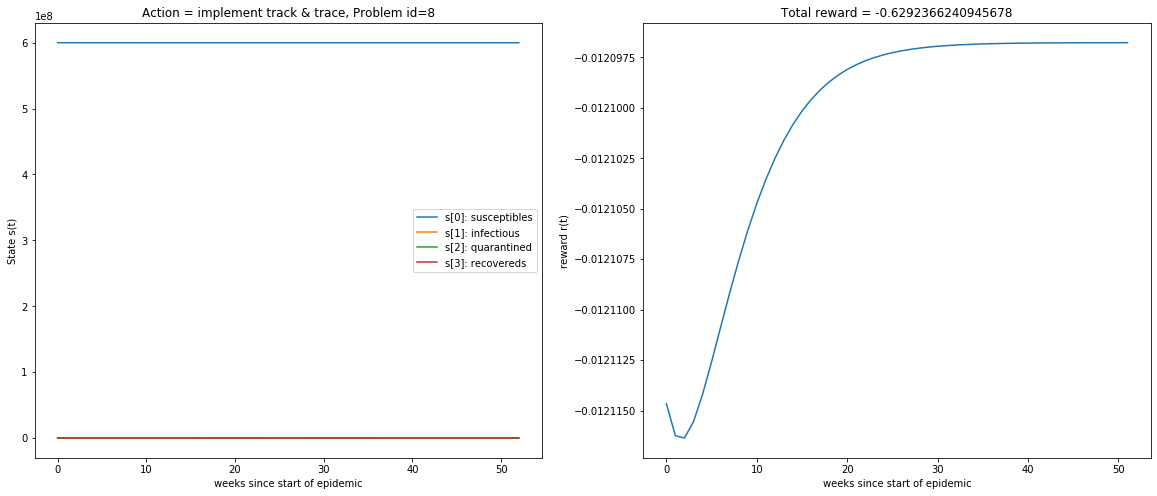

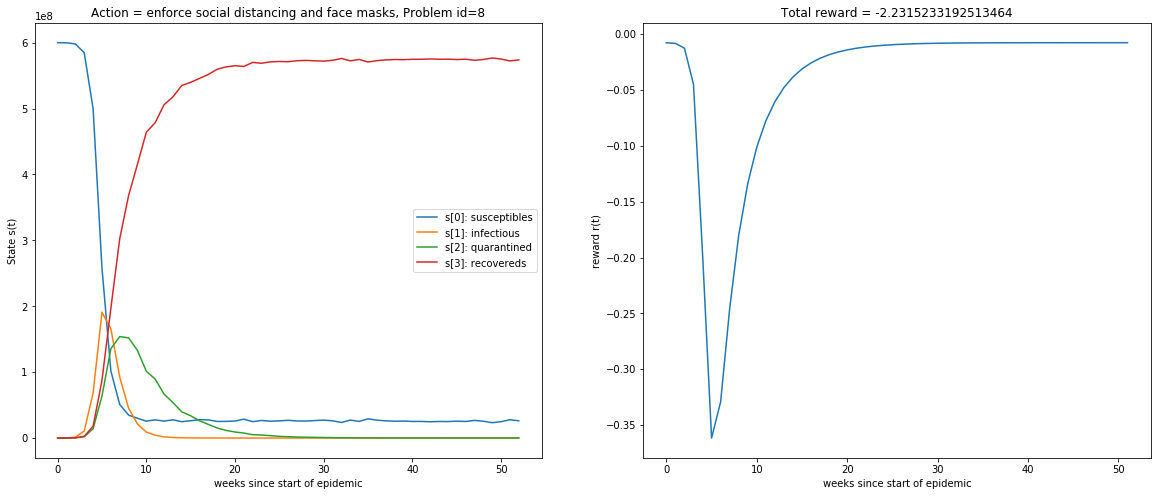

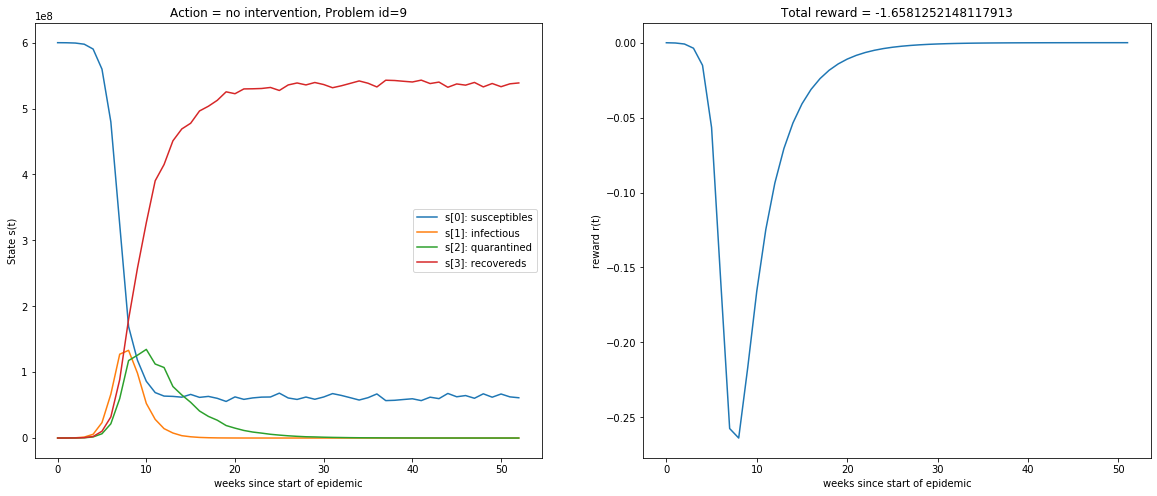

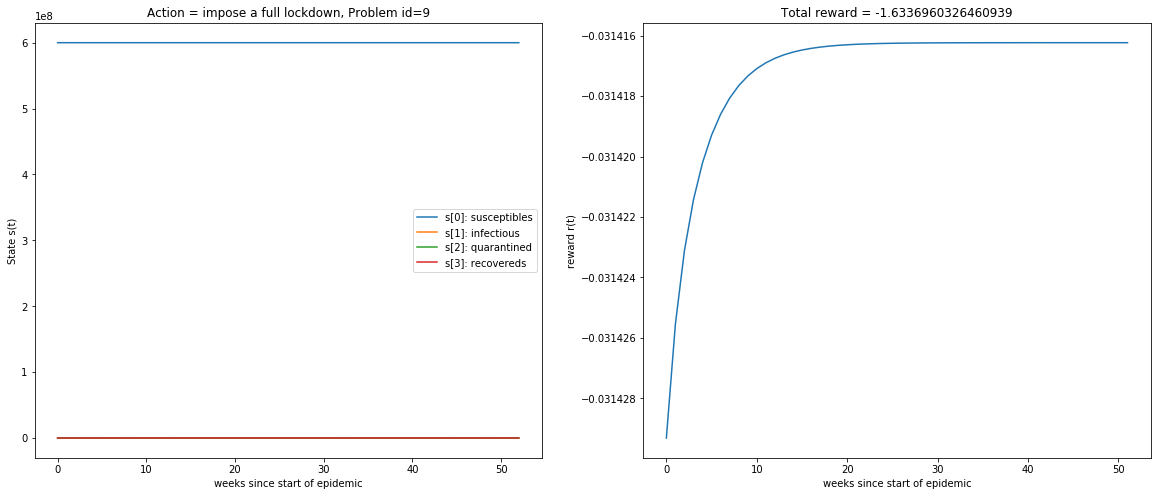

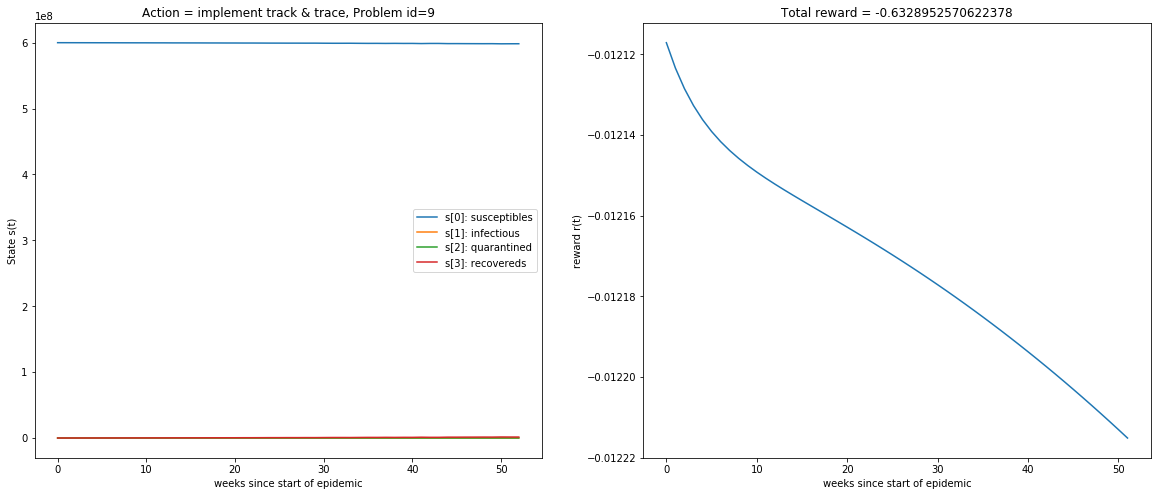

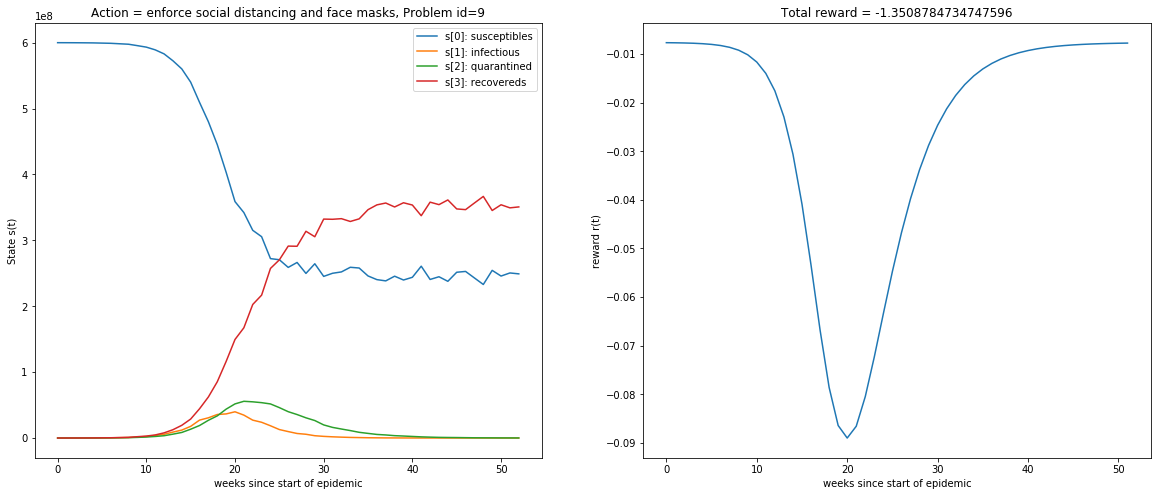

In [2]:
from DeterministicAgent import DeterministicAgent

actions = ["no intervention", "impose a full lockdown", "implement track & trace", "enforce social distancing and face masks"]
stochastic = [False, True]
noisy = [False, True]


for i in range(len(stochastic)):
    for j in range(len(noisy)):
        for action, action_text in enumerate(actions):
            env = virl.Epidemic(stochastic=stochastic[i], noisy=noisy[j])
            agent = DeterministicAgent(env, action, action_text)
            states, rewards = run(agent)
            title = ", Stochastic = " + str(stochastic[i]) + ", " "Noisy = " + str(noisy[j])
            plot(agent, states, rewards, title)

for i in range(0,10):
    for action, action_text in enumerate(actions):
        env = virl.Epidemic(stochastic=True, noisy=True,problem_id=i)
        agent = DeterministicAgent(env, action, action_text)
        states, rewards = run(agent)
        title = ", Problem id=" + str(i)
        plot(agent, states, rewards, title)

## Random

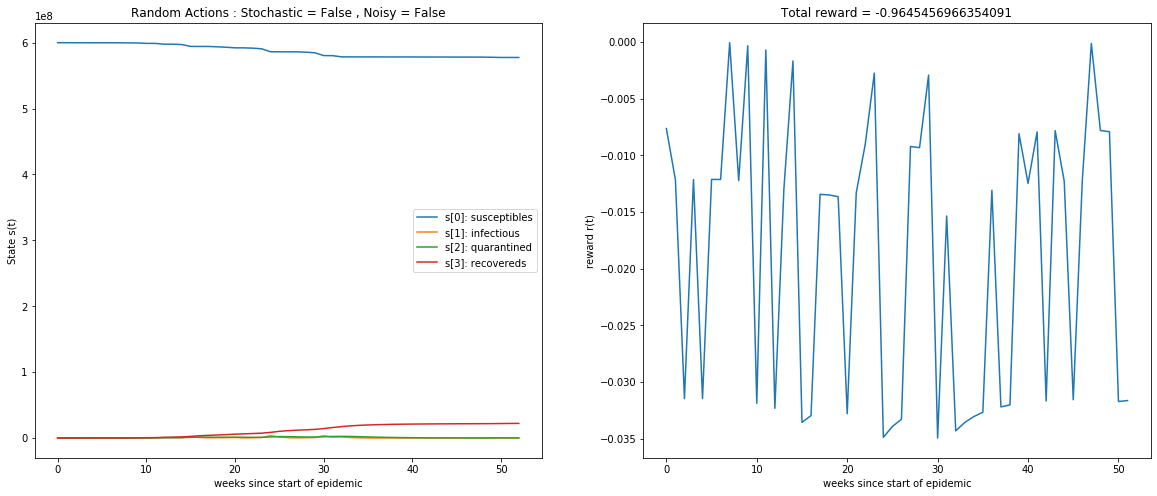

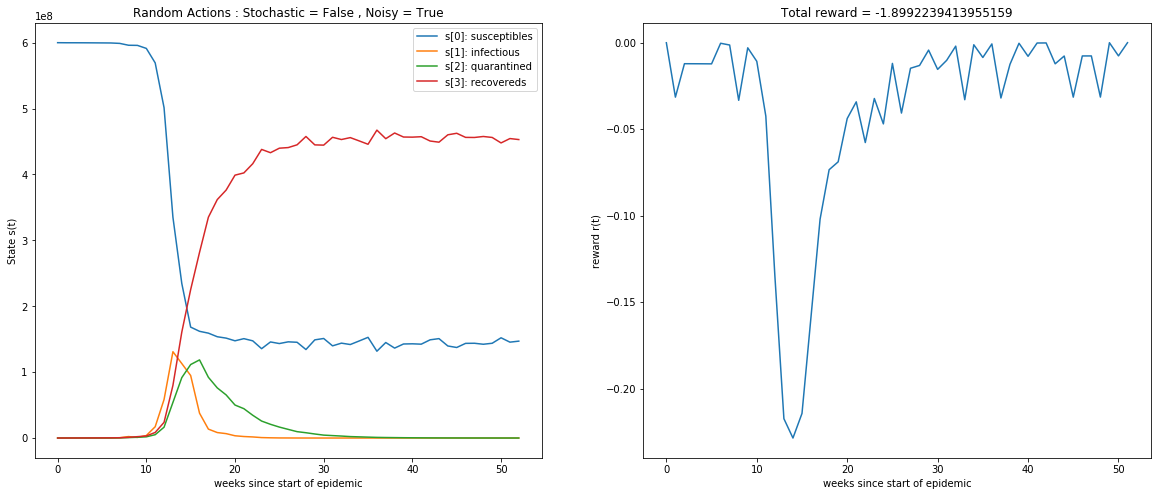

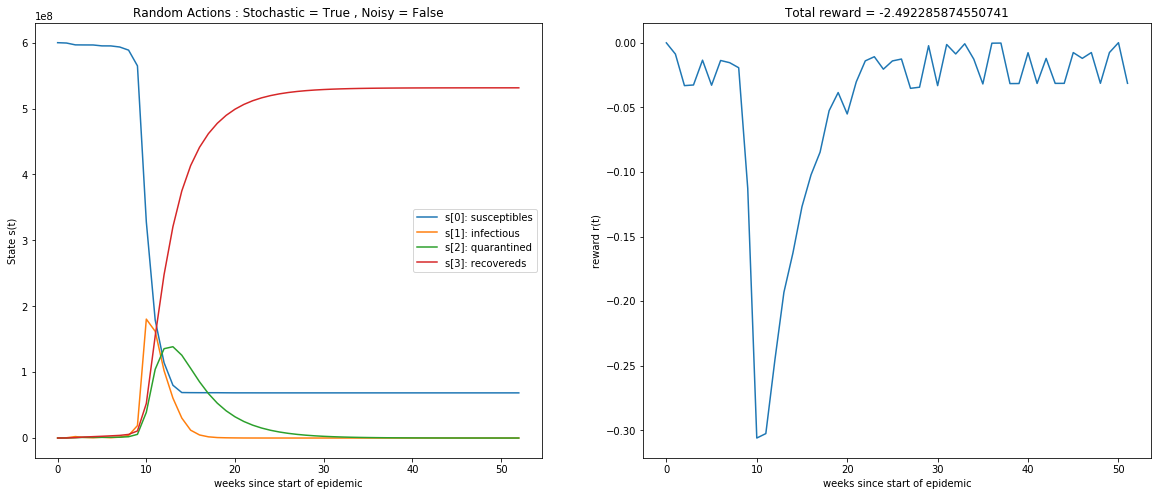

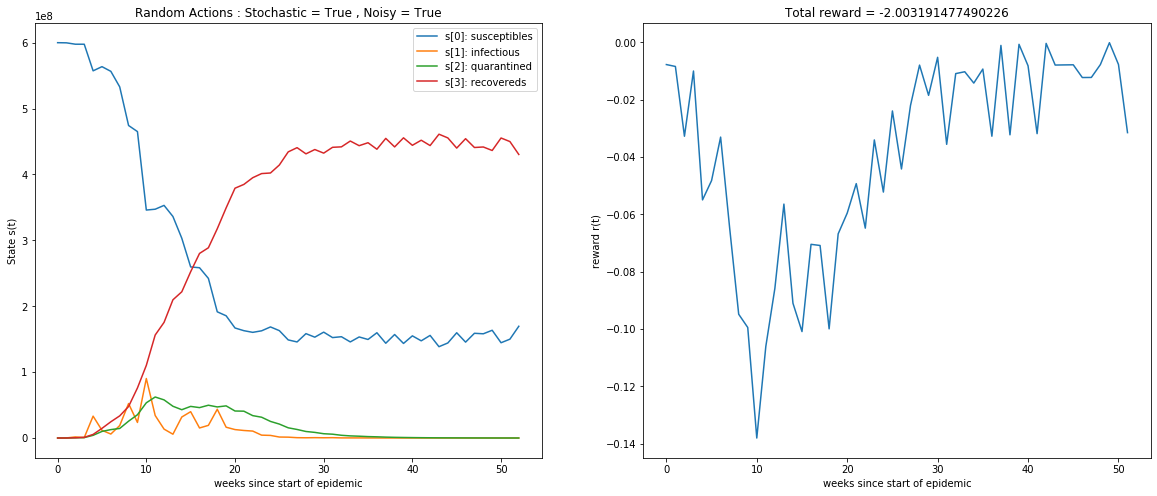

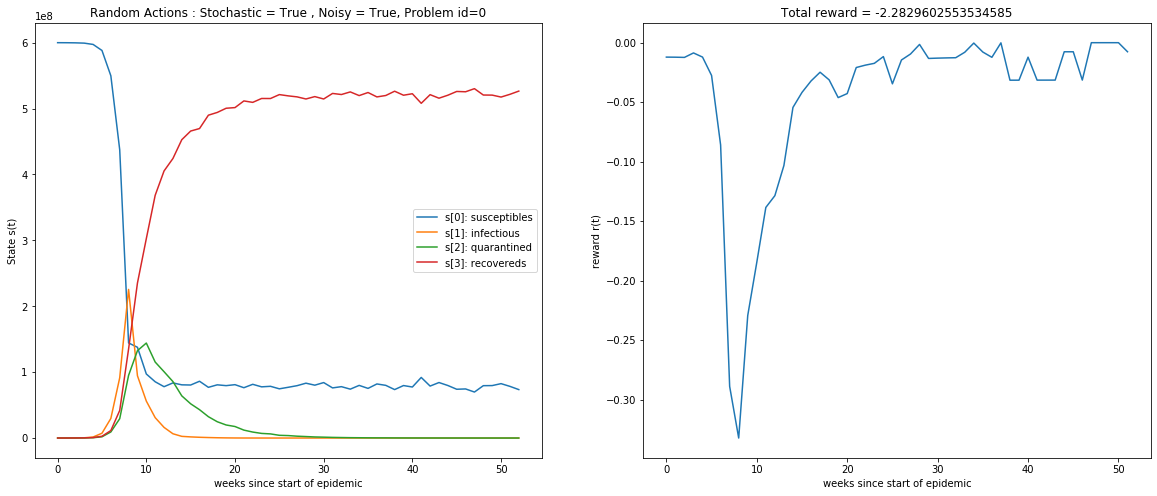

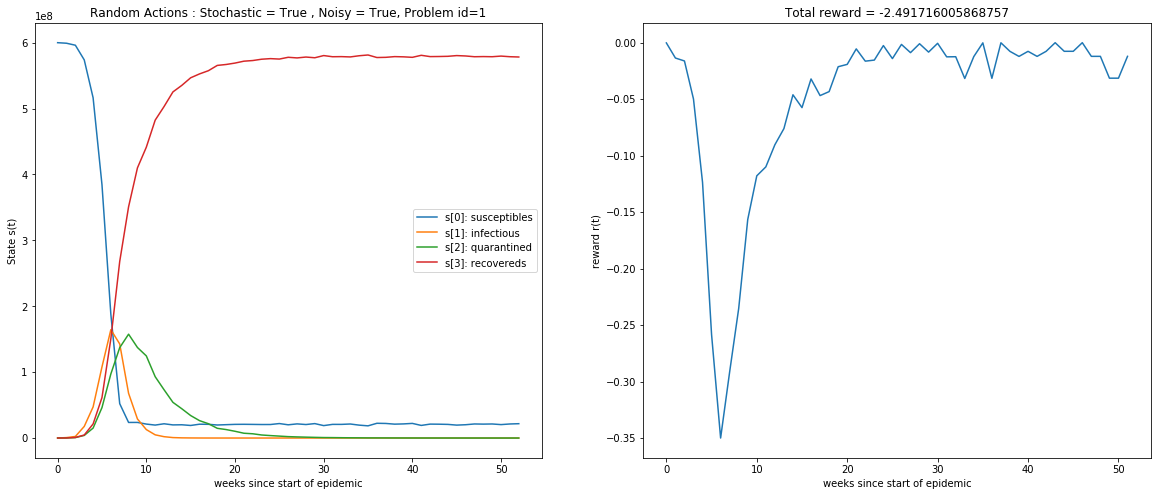

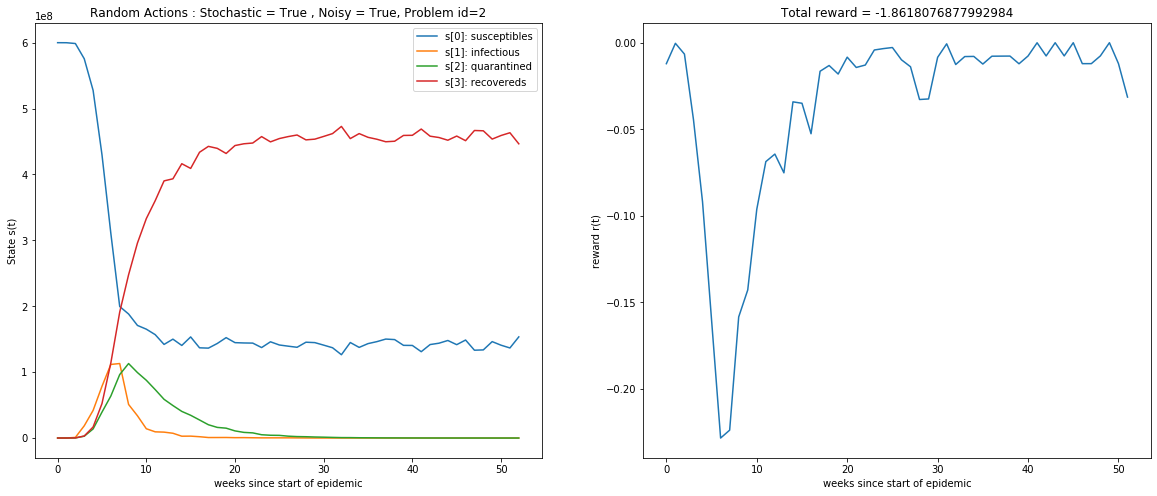

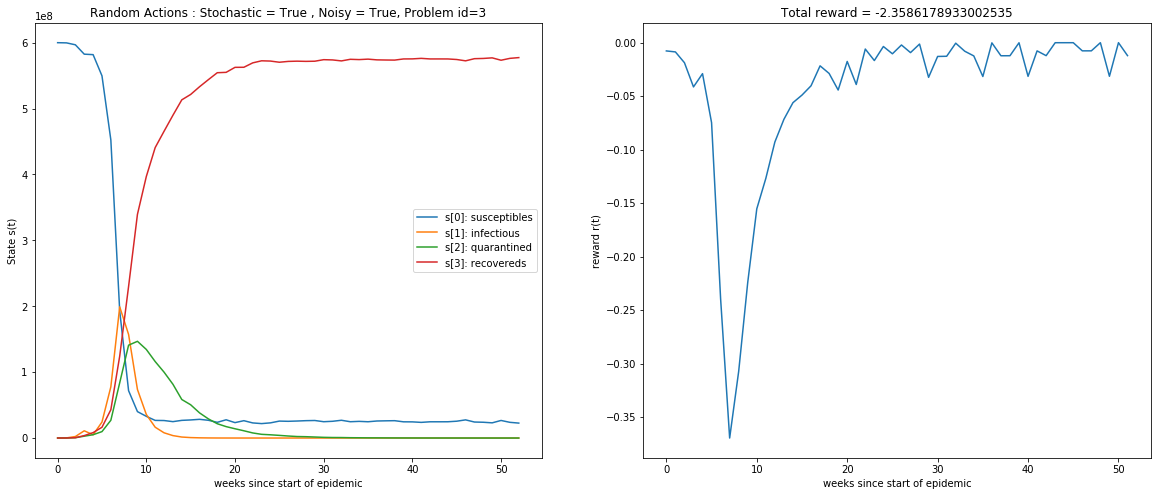

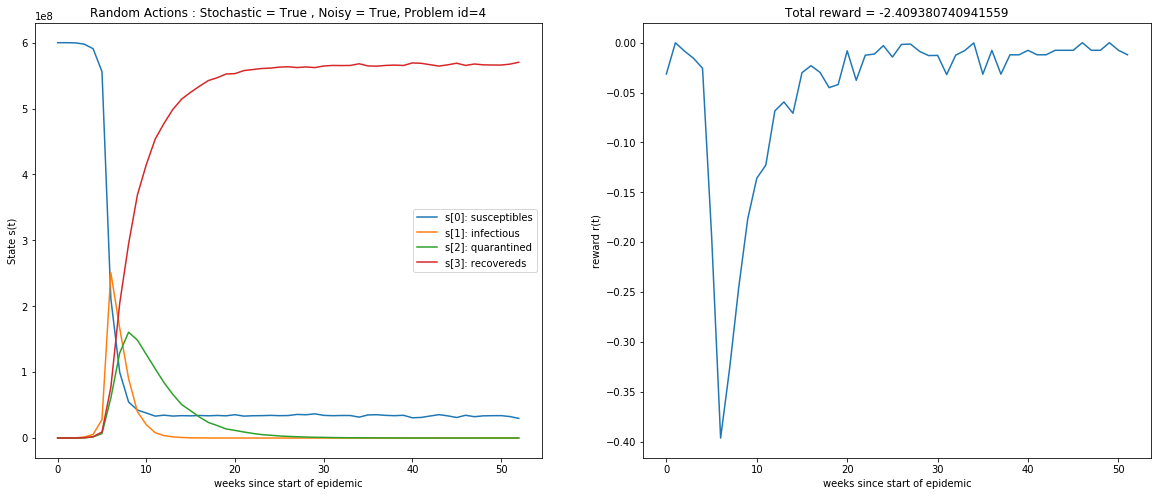

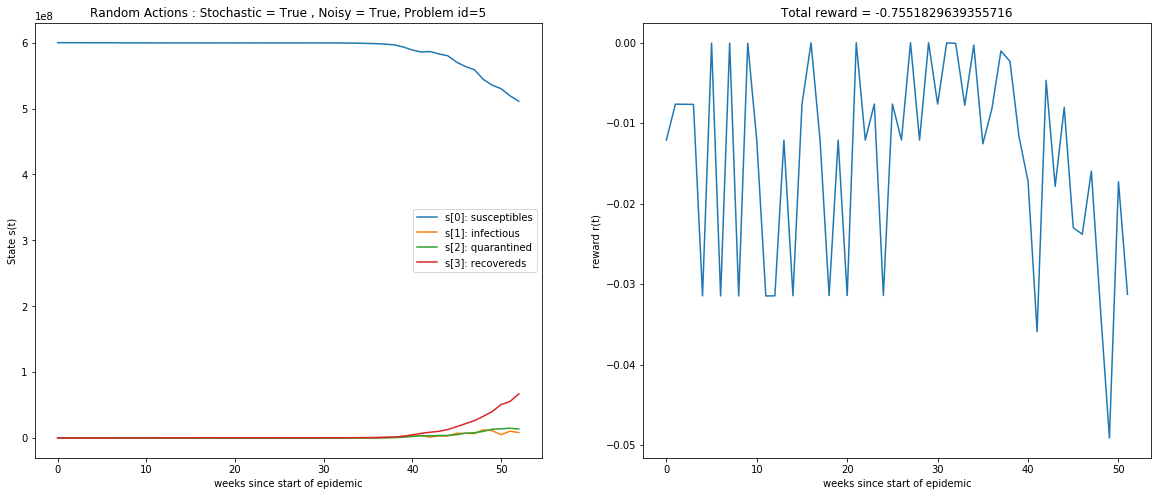

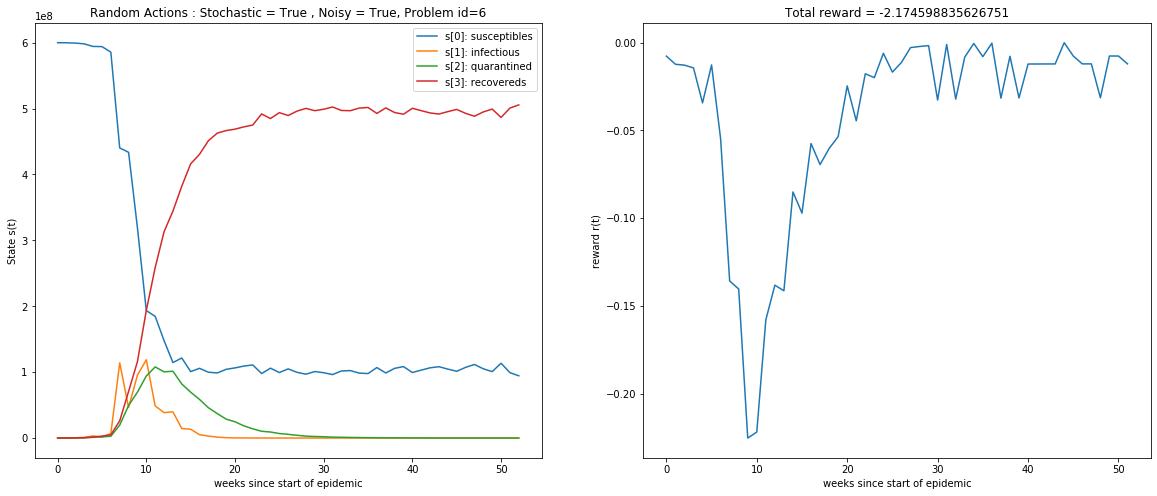

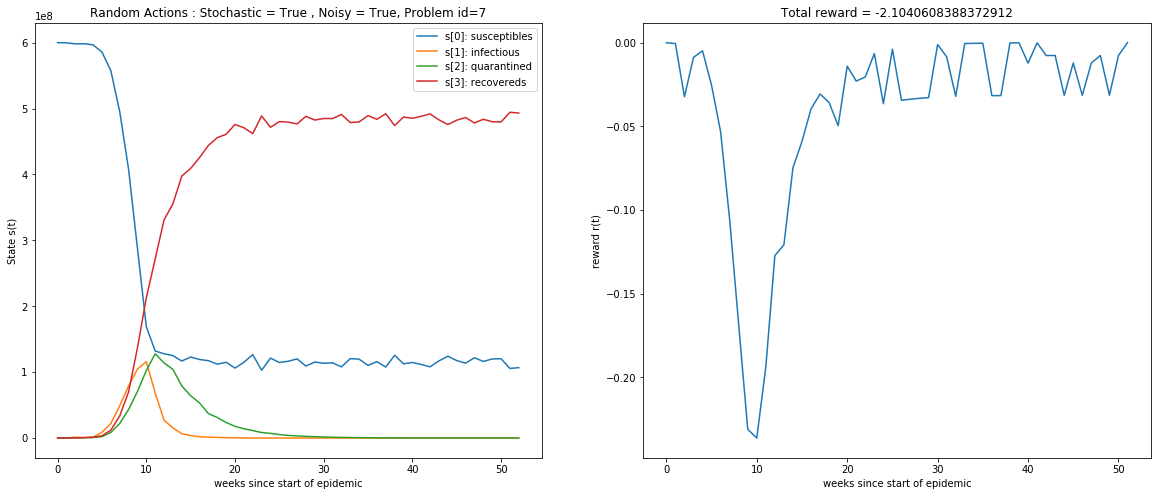

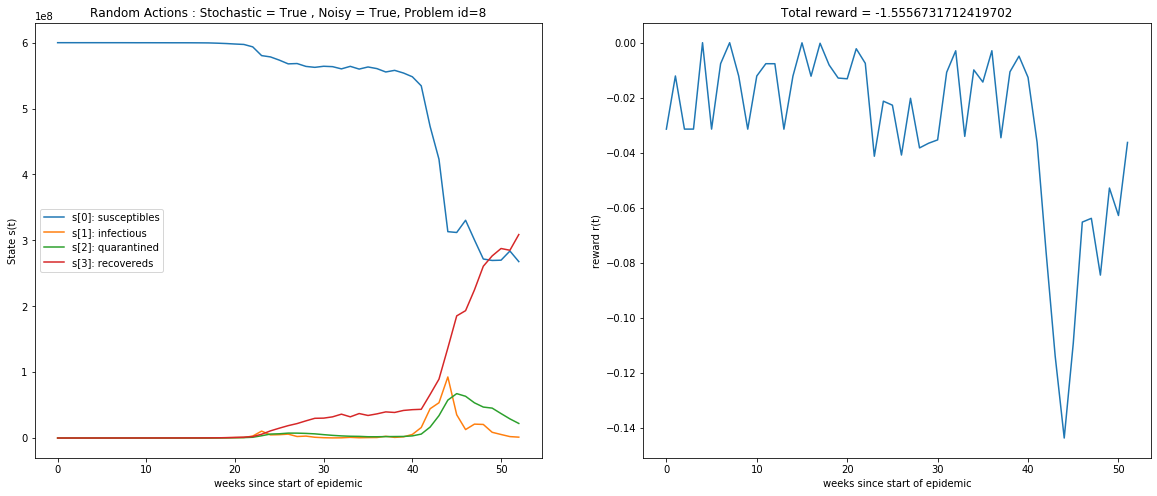

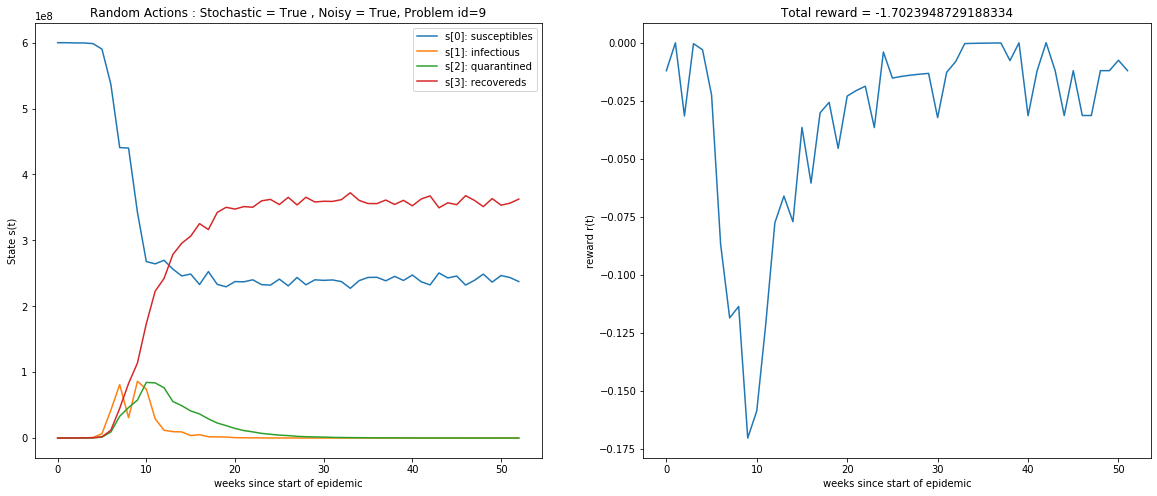

In [3]:
from RandomAgent import RandomAgent

actions = ["no intervention", "impose a full lockdown", "implement track & trace", "enforce social distancing and face masks"]
stochastic = [False, True]
noisy = [False, True]

for i in range(len(stochastic)):
    for j in range(len(noisy)):
        env = virl.Epidemic(stochastic=stochastic[i], noisy=noisy[j])
        agent = RandomAgent(env, actions)
        states, rewards = run(agent)
        plot(agent, states, rewards)
        
for i in range(0,10):
    env = virl.Epidemic(stochastic=True, noisy=True,problem_id=i)
    agent = RandomAgent(env, actions)
    states, rewards = run(agent)
    title = ", Problem id=" + str(i)
    plot(agent, states, rewards, title)

## Linear Policy

In [ ]:
%cd
%cd ai-coursework-group6\notebooks\linear_aprx_output
%pwd

for i in range(0,10):
    title = "Linear Policy Evaluate: problem id " + str(i) + " "
    
    intercept = np.genfromtxt("interceptP" + str(i) + ".csv", delimiter=',')
    coeff = np.genfromtxt("coeffP" + str(i) + ".csv", delimiter=',')
    state_transformed = np.genfromtxt("state_transformedP" + str(i) + ".csv", delimiter=',')
    q_value = np.genfromtxt("q_valueP" + str(i) + ".csv", delimiter=',')
    
    states,all_rewards, all_total_rewards,func_approximator, state_transformed, q_value = agent.evaluate()
    eval_plot(states,agent, all_total_rewards, all_rewards,title)
   

In [ ]:
for i in range(0,4):
    print(stochastic_noisy_print[i])
    title = "Linear Policy Evaluate:" + stochastic_noisy_print
    
    intercept = np.genfromtxt("interceptP" + str(i) + ".csv", delimiter=',')
    coeff = np.genfromtxt("coeffP" + str(i) + ".csv", delimiter=',')
    state_transformed = np.genfromtxt("state_transformedP" + str(i) + ".csv", delimiter=',')
    q_value = np.genfromtxt("q_valueP" + str(i) + ".csv", delimiter=',')
    
    states,all_rewards, all_total_rewards,func_approximator, state_transformed, q_value = agent.evaluate()
    eval_plot(states,agent, all_total_rewards, all_rewards,title)

## Tabular Policy

In [ ]:
%cd
%cd ai-coursework-group6\notebooks
%pwd

for i in range(0,10):
    title = "Q Learning Evaluate: problem id " + str(i) + " "
    
    with open('qlearningP' + str(i) + '.pkl', 'rb') as inpt:
        agent = pickle.load(inpt)
        states,all_rewards, all_total_rewards = agent.evaluate()
        eval_plot(states,agent, all_total_rewards, all_rewards,title)
        mean_std(all_total_rewards,all_rewards,title)
        
        


In [ ]:

for i in range(0,4):
    print(stochastic_noisy_print[i])
    title = "Q Learning Evaluate:" + stochastic_noisy_print
    
    with open('qlearningS' + str(i) + '.pkl', 'rb') as inpt:
        agent = pickle.load(inpt)
    states,all_rewards, all_total_rewards = agent.evaluate()
    eval_plot(states,agent, all_total_rewards, all_rewards,title)
    mean_std(all_total_rewards,all_rewards,title)

## Q learning

C:\Users\chozo
C:\Users\chozo\ai-coursework-group6\notebooks


FileNotFoundError: [Errno 2] No such file or directory: 'qlearningP3.pkl'

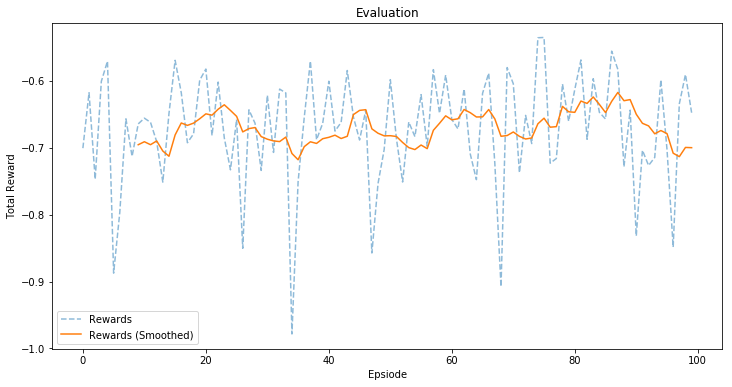

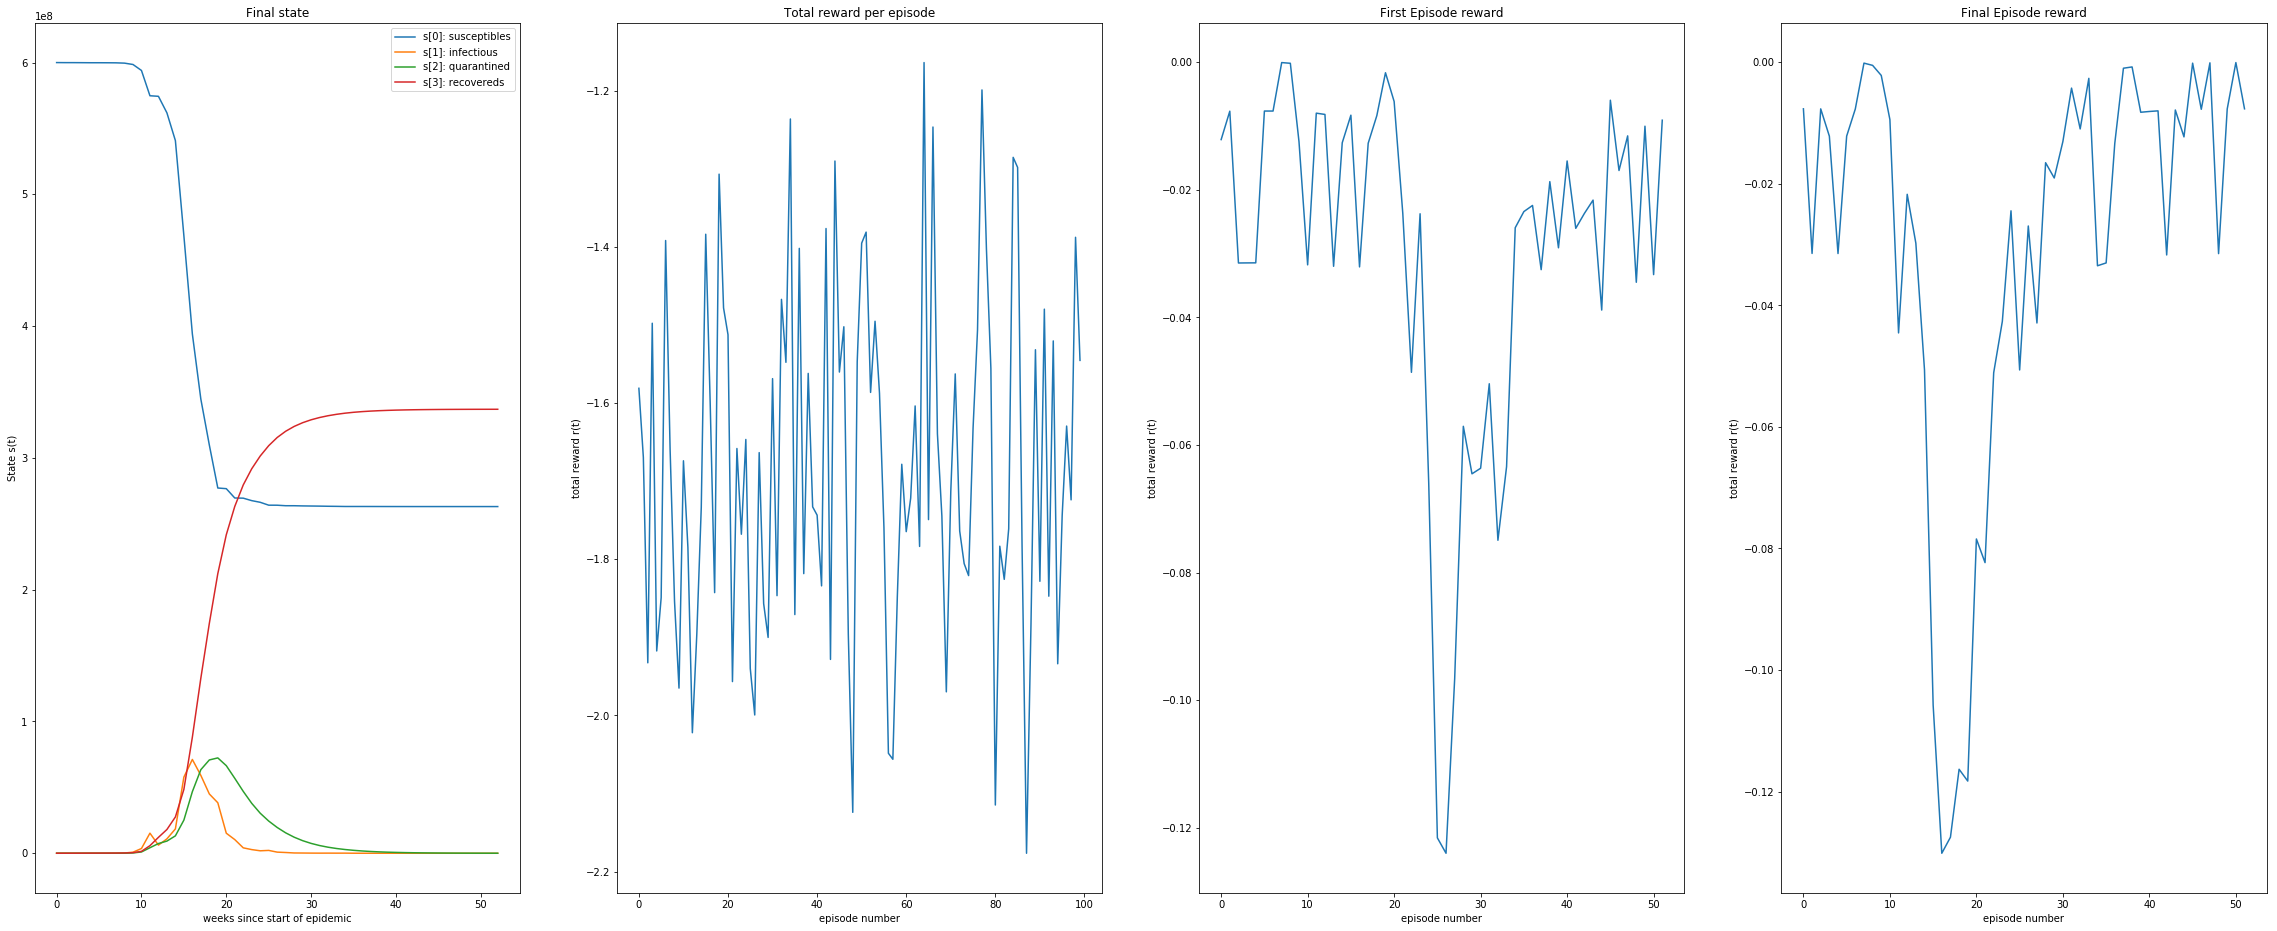

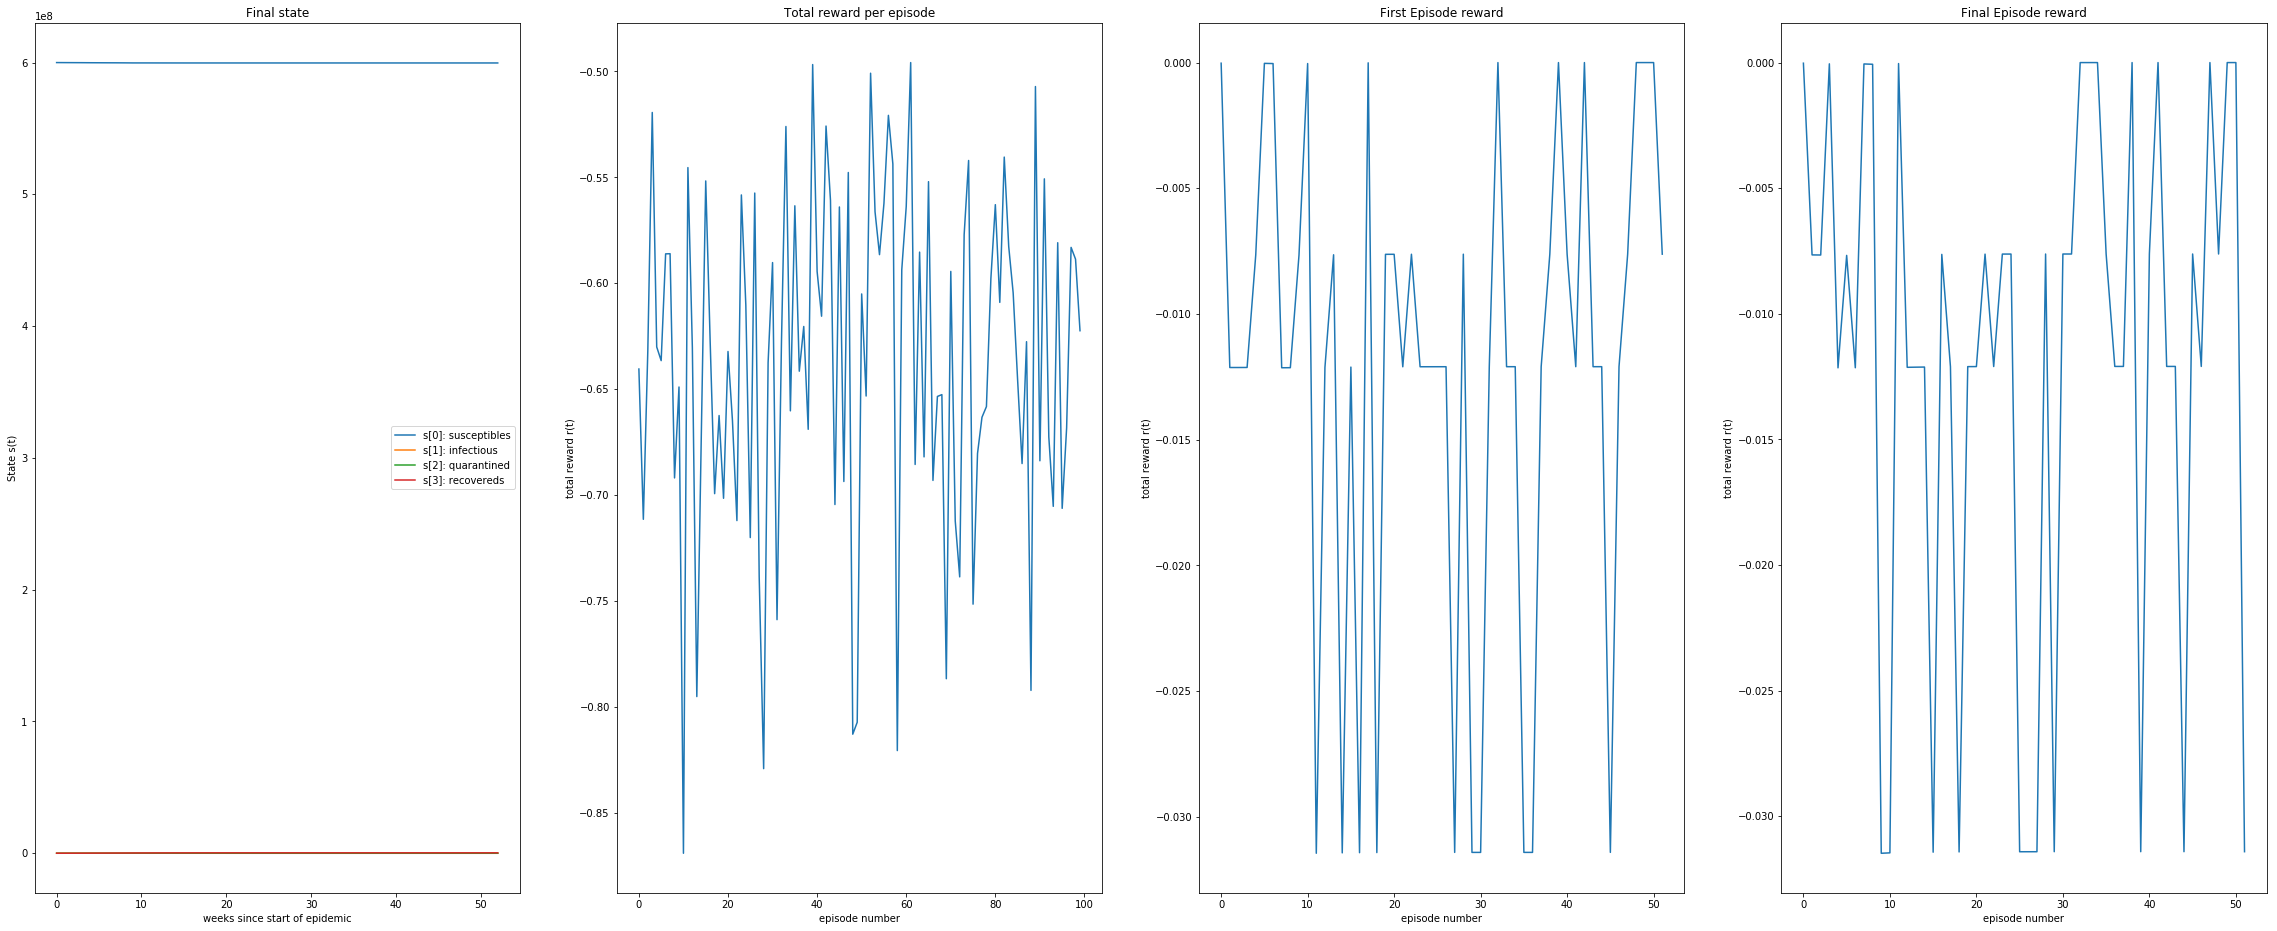

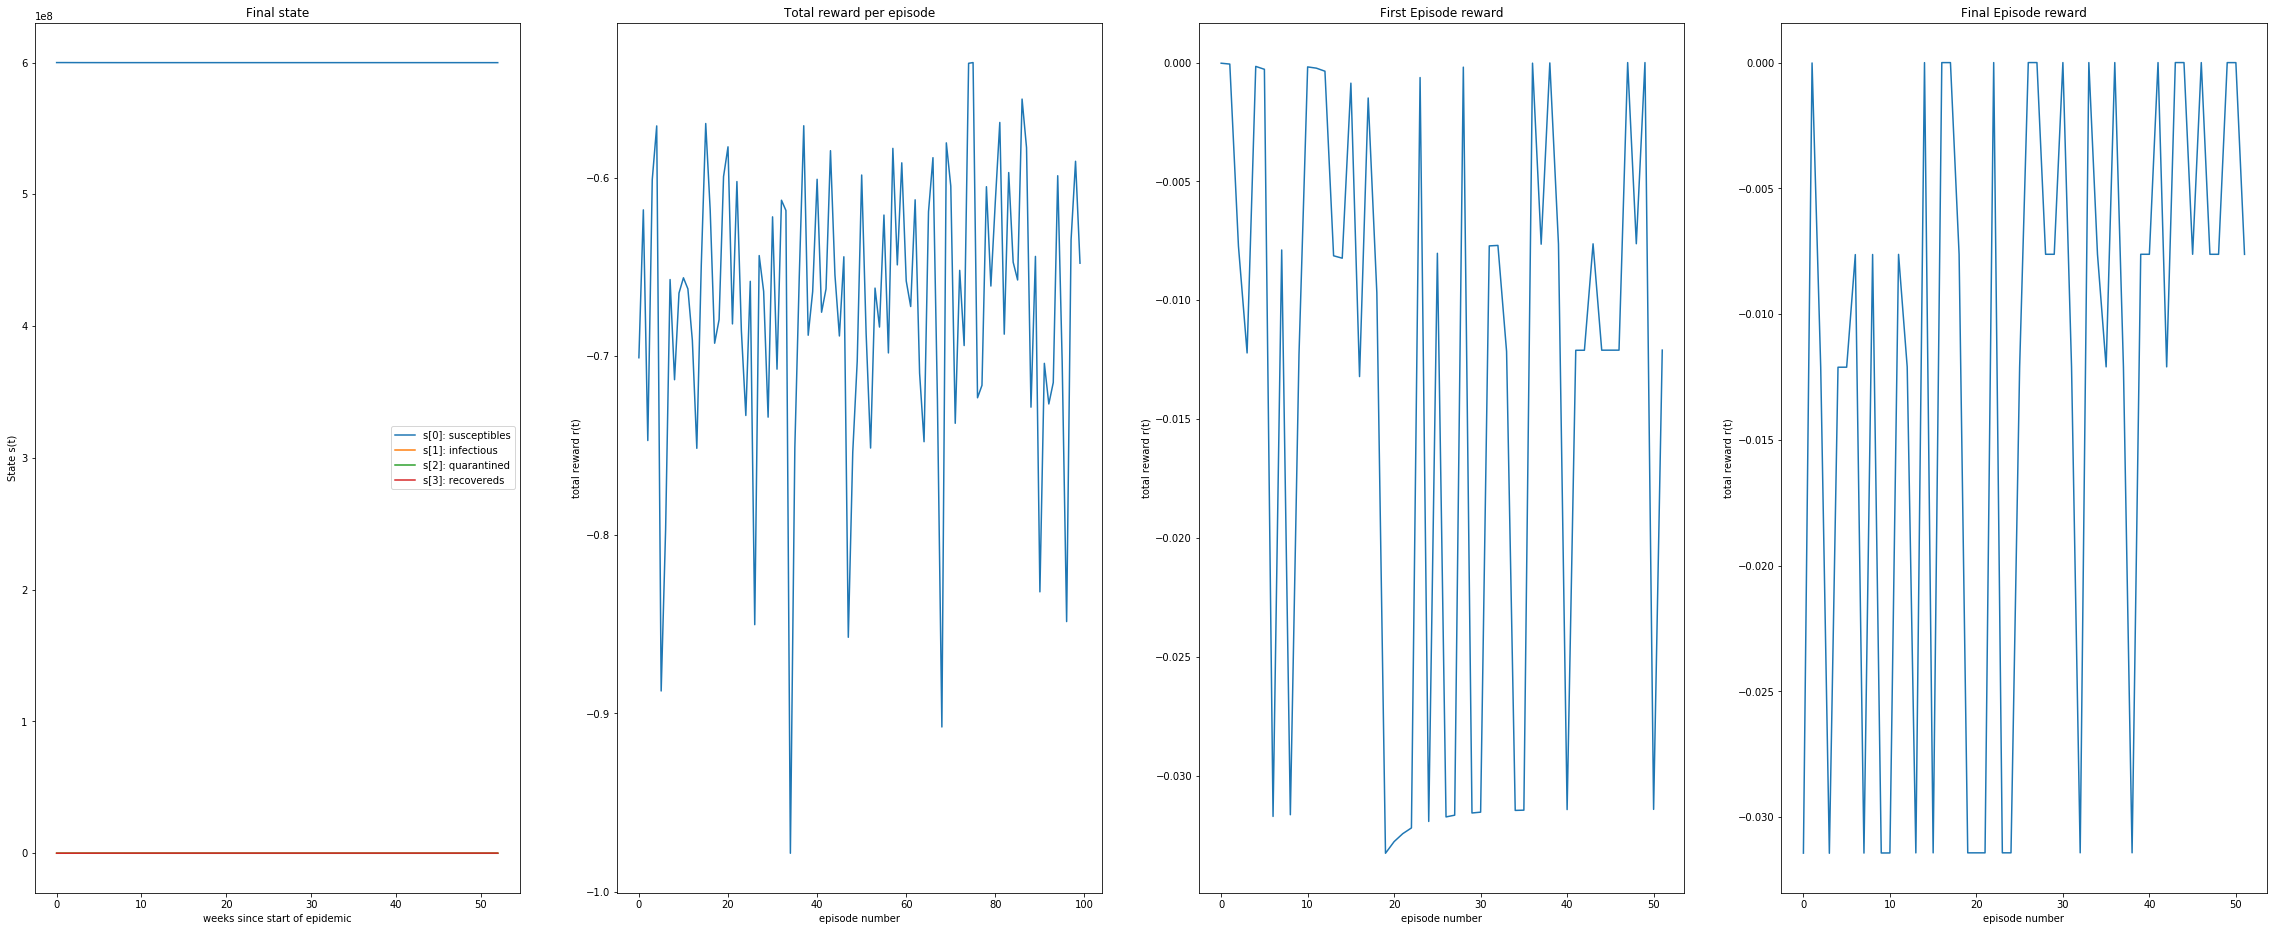

In [5]:
#evaluate the problem id

%cd
%cd ai-coursework-group6\notebooks
%pwd

for i in range(0,10):
    title = "Q Learning Evaluate: problem id " + str(i) + " "
    
    with open('qlearningP' + str(i) + '.pkl', 'rb') as inpt:
        agent = pickle.load(inpt)
        states,all_rewards, all_total_rewards = agent.evaluate()
        eval_plot(states,agent, all_total_rewards, all_rewards,title)
        
        mean_std(all_total_rewards,all_rewards,title)

In [ ]:

for i in range(0,4):
    print(stochastic_noisy_print[i])
    title = "Q Learning Evaluate:" + stochastic_noisy_print
    
    with open('qlearningS' + str(i) + '.pkl', 'rb') as inpt:
        agent = pickle.load(inpt)
    states,all_rewards, all_total_rewards = agent.evaluate()
    eval_plot(states,agent, all_total_rewards, all_rewards,title)

## Q learning Neural Network

In [2]:
from q_learning_nn.nn_function_approximator import NNFunctionApproximatorJointKeras, init_networks, load_trained_network
from q_learning_nn.memory import ReplayMemory, Transition
from q_learning_nn.agent import Agent
from q_learning_nn.strategy import Strategy
from q_learning_nn.run import qlearning_nn
import os
import virl

policy_trained_using_problem_id_zero = "policy_network2.h5"
policy_network_new, target_network_new = load_trained_network(policy_trained_using_problem_id_zero)

In [4]:
for i in range(10):
    agent = Agent(virl.Epidemic(stochastic=False, noisy=False, problem_id=i), learning_rate=0.0)
    rewards = qlearning_nn(
        agent=agent, policy_network=policy_network_new, target_network=target_network_new, num_episodes=1
    )

Evaluation reward -0.8667918869030464
Evaluation reward -0.6291999801501303
Evaluation reward -0.6293770338129265
Evaluation reward -0.6317200225475976
Evaluation reward -0.7455220015846955
Evaluation reward -0.9845347834987108
Evaluation reward -1.0627178859676536
Evaluation reward -1.1019185677030323
Evaluation reward -1.1601219497361983
Evaluation reward -1.1993909909903095
